In [1]:
import pandas as pd 
import numpy as np
import warnings
import sys
sys.path.append('../')
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos y precision
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,  mean_absolute_error, r2_score #Regresion
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
#import optuna

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
#!pip install optuna

In [2]:
from utils.funciones import apply_onehot_encoder

## CARGA Y LECTURA DE DATOS

In [3]:
df = pd.read_csv('../data/processed/DatosLimpios.csv') 

In [4]:
df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad
0,Hyundai,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,13895.06,9
1,Honda,Chennai,46000,Petrol,Manual,3,9.75,1199.0,88.70,5.0,5002.22,13
2,Maruti,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6669.63,12
3,Audi,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,19719.88,11
4,Nissan,Jaipur,86999,Diesel,Manual,3,23.08,1461.0,63.10,5.0,3890.62,11
...,...,...,...,...,...,...,...,...,...,...,...,...
5802,Maruti,Delhi,27365,Diesel,Manual,3,28.40,1248.0,74.00,5.0,5280.12,10
5803,Hyundai,Jaipur,100000,Diesel,Manual,3,24.40,1120.0,71.00,5.0,4446.42,9
5804,Mahindra,Jaipur,55000,Diesel,Manual,2,14.00,2498.0,112.00,8.0,3223.65,12
5805,Maruti,Kolkata,46000,Petrol,Manual,3,18.90,998.0,67.10,5.0,2945.75,11


In [5]:
df['Price_euro'].mean()

10753.033115205786

# SELECCION DE VARIABLES

In [123]:
#numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#numeric_df = df[numeric_cols]

Realizamos la matriz de correlacion de Pearson

In [124]:
numeric_df.corr()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Edad
Kilometers_Driven,1.000000,-0.230460,0.026275,0.137274,0.013335,0.216340,-0.003443,-0.151082,0.519991
Owner_Type,-0.230460,1.000000,0.018131,-0.031040,-0.023288,0.004919,-0.049794,0.052413,-0.325707
Mileage,0.026275,0.018131,1.000000,-0.629252,-0.534014,-0.393840,-0.374001,-0.430773,0.100531
Engine,0.137274,-0.031040,-0.629252,1.000000,0.852293,0.412081,0.723666,0.694858,-0.010370
Power,0.013335,-0.023288,-0.534014,0.852293,1.000000,0.071671,0.871094,0.776023,0.022760
Seats,0.216340,0.004919,-0.393840,0.412081,0.071671,1.000000,-0.013832,0.042496,-0.074621
New_Price,-0.003443,-0.049794,-0.374001,0.723666,0.871094,-0.013832,1.000000,0.871256,0.025263
Price,-0.151082,0.052413,-0.430773,0.694858,0.776023,0.042496,0.871256,1.000000,-0.224598
Edad,0.519991,-0.325707,0.100531,-0.010370,0.022760,-0.074621,0.025263,-0.224598,1.000000


Las variables con la correlacion mas alta con la variable objetivo son las siguientes en su orden: 'Price', 'Power', 'Engine'. De momento descartamos las demas variables numericas del dataframe.

In [125]:
#df_model = df[['Name', 'Location', 'Fuel_Type', 'Transmission', 'Price', 'Power', 'Engine', 'New_Price']]

In [126]:
#df_model.head()

# Division de Datos (X e y)

In [6]:
#X = df_model.drop(columns=['New_Price', 'Name', 'Location'], axis=1)
#y = df_model['New_Price']

X = df.drop(columns=['Price_euro'], axis=1)
y = df['Price_euro']

### DIVIDIMOS EL DATASET

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### PCA

Escalamos primero las variables continuas que vamos a usar en el PCA

Aplicmos la estandarizacion a las variables de Train

In [158]:
var_ss = ['Kilometers_Driven', 'Mileage', 'Power',	'Engine']
SS = StandardScaler()
X_train[var_ss] = SS.fit_transform(X_train[var_ss])

Aplicamos lo mismo para Test

In [159]:
X_test[var_ss] = SS.transform(X_test[var_ss])

In [160]:
X_train.shape

(4645, 11)

In [161]:
X_test.shape

(1162, 11)

In [164]:
# Aplicar PCA al conjunto de entrenamiento
train_data = X_train[var_ss]
pca_train = PCA(n_components=2)
train_data_pca = pca_train.fit_transform(train_data)

# Crear un nuevo DataFrame con los componentes principales del conjunto de entrenamiento
columns_pca_train = [f"PC{i+1}_train" for i in range(pca_train.n_components_)]
df_train_pca = pd.DataFrame(train_data_pca, columns=columns_pca_train)

X_train_reset = X_train.reset_index(drop=True)
# Concatenar los componentes principales con el DataFrame de entrenamiento original
X_train_PCA = pd.concat([X_train_reset, df_train_pca], axis=1)

# Eliminar las variables originales después de la concatenación
X_train_PCA = X_train_PCA.drop(var_ss, axis=1)

# Imprimir el DataFrame combinado para entrenamiento
X_train_PCA

,Name,Location,Fuel_Type,Transmission,Owner_Type,Seats,Edad,PC1_train,PC2_train
0,Audi,Hyderabad,Diesel,Automatic,3,5.0,11,0.891229,0.379969
1,BMW,Kochi,Diesel,Automatic,3,5.0,6,0.894152,-0.378066
2,Mahindra,Kolkata,Diesel,Manual,3,7.0,11,1.111646,-0.217910
3,Maruti,Hyderabad,Petrol,Manual,2,5.0,10,-1.108014,-0.176837
4,Ford,Bangalore,Diesel,Manual,1,7.0,13,1.820038,0.010322
...,...,...,...,...,...,...,...,...,...
4640,Hyundai,Hyderabad,Petrol,Manual,3,5.0,20,0.296344,0.497668
4641,Hyundai,Hyderabad,Petrol,Manual,3,5.0,14,-0.637867,0.314866
4642,Maruti,Chennai,Petrol,Automatic,3,5.0,7,-1.252822,-0.071935
4643,Maruti,Hyderabad,Diesel,Manual,2,5.0,9,-1.630123,0.004420


In [165]:
# Aplicar PCA al conjunto de prueba
test_data = X_test[var_ss]
pca_test = PCA(n_components=2)
test_data_pca = pca_test.fit_transform(test_data)

# Crear un nuevo DataFrame con los componentes principales del conjunto de prueba
columns_pca_test = [f"PC{i+1}_test" for i in range(pca_test.n_components_)]
df_test_pca = pd.DataFrame(test_data_pca, columns=columns_pca_test)

X_test_reset = X_test.reset_index(drop=True)
# Concatenar los componentes principales con el DataFrame de prueba original
X_test_PCA = pd.concat([X_test_reset, df_test_pca], axis=1)

# Eliminar las variables originales después de la concatenación
X_test_PCA = X_test_PCA.drop(var_ss, axis=1)

# Imprimir el DataFrame combinado para prueba
X_test_PCA

,Name,Location,Fuel_Type,Transmission,Owner_Type,Seats,Edad,PC1_test,PC2_test
0,Audi,Coimbatore,Diesel,Automatic,3,5.0,7,0.992412,-0.646476
1,Maruti,Delhi,Petrol,Manual,2,5.0,14,-0.696071,0.562650
2,Hyundai,Mumbai,Petrol,Manual,3,5.0,8,-1.881302,0.289309
3,Maruti,Jaipur,Petrol,Manual,3,5.0,5,-2.443848,-0.336405
4,BMW,Delhi,Petrol,Automatic,3,5.0,13,2.816799,0.042608
...,...,...,...,...,...,...,...,...,...
1157,Renault,Kolkata,Diesel,Manual,3,5.0,10,-0.383659,-0.065311
1158,Skoda,Kochi,Petrol,Automatic,3,5.0,8,1.152490,0.358995
1159,Mercedes-Benz,Coimbatore,Diesel,Automatic,3,5.0,7,0.923244,-0.998248
1160,Mini,Mumbai,Diesel,Automatic,3,5.0,8,-0.516328,-0.483771


### Tratamiento variables categoricas

### LabelEncoder

In [8]:
#Realizamos la transformacion de la variable 'Name' del conjunto Train
var_LE = ['Name', 'Location', 'Fuel_Type', 'Transmission']
le = LabelEncoder()
#for col in var_LE:
#    X_train_PCA[col] = le.fit_transform(X_train_PCA[col])

for col in var_LE:
    X_train[col] = le.fit_transform(X_train[col])

In [9]:
#Realizamos la transformacion de la variable 'Name' del conjunto Test

#for col in var_LE:
#    X_test_PCA[col] = le.fit_transform(X_test_PCA[col])

for col in var_LE:
    X_test[col] = le.fit_transform(X_test[col])

### OHE

In [114]:
var_1he = ['Location', 'Fuel_Type',	'Transmission']
#var_1he = ['Fuel_Type',	'Transmission']

#X_train_PCA, X_test_PCA = apply_onehot_encoder(X_train_PCA, var_1he, X_test_PCA)

### Ensayo los modelos y sus metricas

In [ ]:
# Definir modelos a evaluar
models = {'Linear Regression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'ElasticNet' : ElasticNet(),
    'Bayes' : BayesianRidge(),
    'DecisionTreeRegressor'  : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'GradientBootingRegressor' : GradientBoostingRegressor(),
    'SVR' : SVR(),
    'KNRegressor' : KNeighborsRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'LGBMRegressor' : LGBMRegressor(),
    'CatBoostRegressor' : CatBoostRegressor(verbose=False)}

# Definir métricas de evaluación
metrics = {
    'Mean Squared Error': mean_squared_error,
    'Mean Absolute Error': mean_absolute_error,
    'R2 Score' : r2_score
}

# Configurar la validación cruzada (k-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Ciclo para evaluar modelos y métricas
results = []
for model_name, model in models.items():
    print(f"Modelo: {model_name}")
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        scores = -scores  # Convertir de negativo a positivo para errores cuadráticos
        mean_score = np.mean(scores)
        print(f"{metric_name}: {mean_score}")
        results.append({'Model': model_name, 'Metric': metric_name, 'Score': mean_score})
    print("\n")

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)
print("Resultados Finales:")
print(results_df)

In [145]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    BayesianRidge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(verbose=False)
    ]

# Create lists to store metrics
model_names = []
mae_values = []
mse_values = []
r2_values = []

# For loop to fit and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_names.append(model_name)
    mae_values.append(mae)
    mse_values.append(mse)
    r2_values.append(r2)
    
    # Print the metrics
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R^2): {r2:.2f}")
    print("-" * 40)


Model: LinearRegression
Mean Absolute Error (MAE): 3.79
Mean Squared Error (MSE): 34.88
R-squared (R^2): 0.69
----------------------------------------
Model: Ridge
Mean Absolute Error (MAE): 3.79
Mean Squared Error (MSE): 34.89
R-squared (R^2): 0.69
----------------------------------------
Model: Lasso
Mean Absolute Error (MAE): 3.91
Mean Squared Error (MSE): 38.20
R-squared (R^2): 0.66
----------------------------------------
Model: ElasticNet
Mean Absolute Error (MAE): 3.91
Mean Squared Error (MSE): 38.04
R-squared (R^2): 0.66
----------------------------------------
Model: BayesianRidge
Mean Absolute Error (MAE): 3.79
Mean Squared Error (MSE): 34.95
R-squared (R^2): 0.69
----------------------------------------
Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 2.23
Mean Squared Error (MSE): 26.24
R-squared (R^2): 0.77
----------------------------------------
Model: RandomForestRegressor
Mean Absolute Error (MAE): 1.68
Mean Squared Error (MSE): 16.97
R-squared (R^2): 0.85
-----

In [173]:
# Crear listas para almacenar métricas
model_names = []
mae_values = []
mse_values = []
r2_values = []

# Crear DataFrame para almacenar resultados
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R^2'])

# Lista de modelos
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    BayesianRidge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(verbose=False)
]

# For loop para ajustar y evaluar cada modelo
for model in models:
    model_name = model.__class__.__name__

    try:
        # Ajustar el modelo
        model.fit(X_train, y_train)
        
        # Calcular métricas usando validación cruzada en el conjunto de entrenamiento
        mae_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
        mse_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
        r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)

        # Almacenar resultados en listas
        model_names.append(model_name)
        mae_values.append(np.mean(mae_scores))
        mse_values.append(np.mean(mse_scores))
        r2_values.append(np.mean(r2_scores))

        # Imprimir resultados para cada modelo
        print(f"{model_name}: MAE = {np.mean(mae_scores):.2f}, MSE = {np.mean(mse_scores):.2f}, R^2 = {np.mean(r2_scores):.4f}")

    except Exception as e:
        print(f"Error en el modelo {model_name}: {str(e)}")

# Almacenar resultados en un DataFrame
results_df['Model'] = model_names
results_df['MAE'] = mae_values
results_df['MSE'] = mse_values
results_df['R^2'] = r2_values

# Imprimir el DataFrame con los resultados finales
results_df

LinearRegression: MAE = 3.83, MSE = 45.24, R^2 = 0.6542
Ridge: MAE = 3.83, MSE = 45.23, R^2 = 0.6542
Lasso: MAE = 3.87, MSE = 47.71, R^2 = 0.6346
ElasticNet: MAE = 3.87, MSE = 47.60, R^2 = 0.6355
BayesianRidge: MAE = 3.83, MSE = 45.14, R^2 = 0.6550
DecisionTreeRegressor: MAE = 2.16, MSE = 24.62, R^2 = 0.7764
RandomForestRegressor: MAE = 1.58, MSE = 13.89, R^2 = 0.8994
GradientBoostingRegressor: MAE = 1.79, MSE = 13.38, R^2 = 0.8996
SVR: MAE = 5.99, MSE = 141.64, R^2 = -0.0811
KNeighborsRegressor: MAE = 4.17, MSE = 59.10, R^2 = 0.5474
XGBRegressor: MAE = 1.42, MSE = 11.70, R^2 = 0.9127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 4645, number of used features: 11
[LightGBM] [Info] Start training from score 9.676982
[Lig

,Model,MAE,MSE,R^2
0,LinearRegression,3.828142,45.235410,0.654171
1,Ridge,3.828061,45.232314,0.654196
2,Lasso,3.870828,47.706756,0.634621
3,ElasticNet,3.871610,47.603113,0.635453
4,BayesianRidge,3.826032,45.138758,0.654960
5,DecisionTreeRegressor,2.164081,24.616417,0.776431
6,RandomForestRegressor,1.582218,13.889147,0.899403
7,GradientBoostingRegressor,1.790907,13.383541,0.899588
8,SVR,5.993484,141.642687,-0.081083
9,KNeighborsRegressor,4.167543,59.103775,0.547402


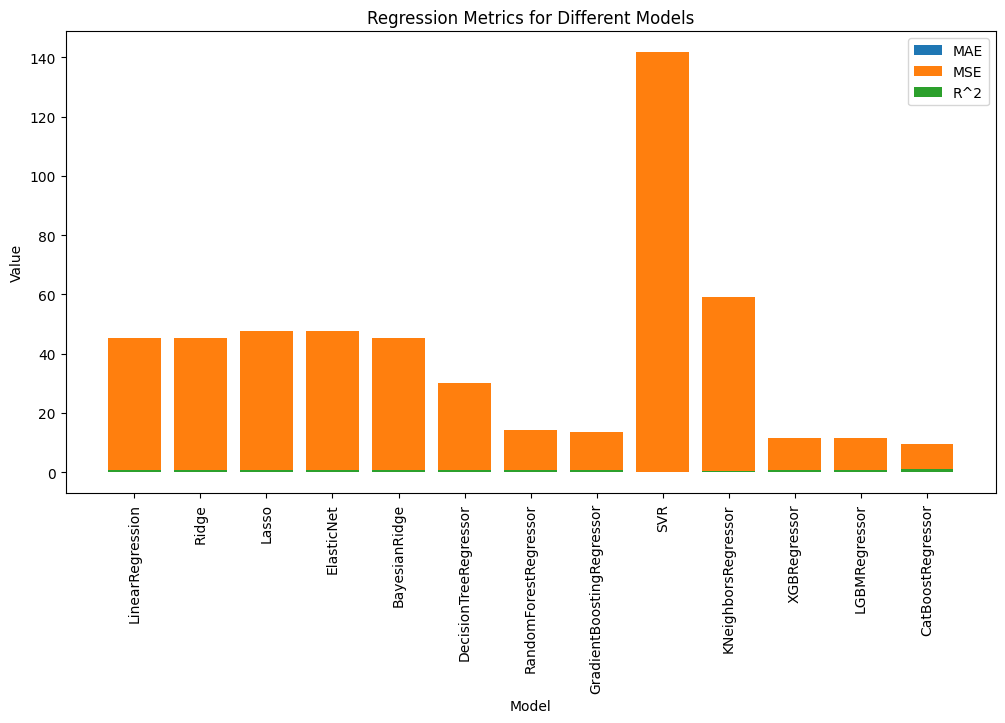

In [156]:
# Plot the metrics
plt.figure(figsize=(12, 6))
plt.bar(model_names, mae_values, label='MAE')
plt.bar(model_names, mse_values, label='MSE')
plt.bar(model_names, r2_values, label='R^2')
plt.legend()
plt.title('Regression Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [169]:
# Resultados del ejercicio utilizando PCA para las variables continuas y L.Encoder para las variables categoricas
#results_df

,Model,MAE,MSE,R^2
0,LinearRegression,4.049262,50.630793,0.612345
1,Ridge,4.048987,50.591417,0.612668
2,Lasso,4.318530,49.351914,0.627004
3,ElasticNet,4.126646,50.321000,0.619877
4,BayesianRidge,4.047493,50.401460,0.614230
5,DecisionTreeRegressor,2.345781,32.959403,0.746988
6,RandomForestRegressor,1.794617,16.618041,0.876293
7,GradientBoostingRegressor,2.053016,17.346483,0.871532
8,SVR,3.199834,55.530511,0.579670
9,KNeighborsRegressor,2.162969,24.794475,0.814213


In [152]:
# Resultados del ejercicio utilizando L.Encoder para las variables categoricas, a las variables continuas 
#no se les hizo ningun tipo de transformacion

#results_df 

,Model,MAE,MSE,R^2
0,LinearRegression,3.828142,45.235410,0.654171
1,Ridge,3.828061,45.232314,0.654196
2,Lasso,3.870828,47.706756,0.634621
3,ElasticNet,3.871610,47.603113,0.635453
4,BayesianRidge,3.826032,45.138758,0.654960
5,DecisionTreeRegressor,2.131072,27.622891,0.771008
6,RandomForestRegressor,1.572395,13.460020,0.896067
7,GradientBoostingRegressor,1.790440,13.306886,0.899016
8,SVR,5.993484,141.642687,-0.081083
9,KNeighborsRegressor,4.167543,59.103775,0.547402


1.367534	9.897766	0.926791

In [175]:
feature_importance = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir la importancia de las características
print("Importancia de las características:")
feature_importance_df

Importancia de las características:


,Feature,Importance
8,Power,42.883754
10,Edad,20.033285
7,Engine,9.924719
0,Name,6.373975
2,Kilometers_Driven,5.928110
6,Mileage,4.830622
1,Location,3.709706
4,Transmission,3.120943
3,Fuel_Type,1.554595
9,Seats,1.499088


In [174]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

feature_importance = lgbm_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir el DataFrame con las importancias de las características
feature_importance_df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 4645, number of used features: 11
[LightGBM] [Info] Start training from score 9.676982


,Feature,Importance
8,Power,718
6,Mileage,560
10,Edad,365
2,Kilometers_Driven,342
0,Name,307
7,Engine,273
1,Location,261
4,Transmission,62
3,Fuel_Type,49
9,Seats,45


Segun las evaluaciones de Feature_Importance de los dos modelos que mejores metricas mostraron, es evidente que las variables que menos destacan en la prediccion coinciden en los dos ejercicios: 'Transmission', 'Fuel_Type', 'Seats'	y 'Owner_Type'. Procederemos a elimiarlas para ver que mejoras experimentamos.	

In [176]:
X_train = X_train.drop(columns=['Transmission', 'Fuel_Type', 'Seats', 'Owner_Type'], axis=1)

X_test = X_test.drop(columns=['Transmission', 'Fuel_Type', 'Seats', 'Owner_Type'], axis=1)

Volvemos a evaluar los modelos con la eliminacion de las columnas

In [177]:
# Crear listas para almacenar métricas
model_names = []
mae_values = []
mse_values = []
r2_values = []

# Crear DataFrame para almacenar resultados
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R^2'])

# Lista de modelos
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    BayesianRidge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(verbose=False)
]

# For loop para ajustar y evaluar cada modelo
for model in models:
    model_name = model.__class__.__name__

    try:
        # Ajustar el modelo
        model.fit(X_train, y_train)
        
        # Calcular métricas usando validación cruzada en el conjunto de entrenamiento
        mae_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
        mse_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
        r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)

        # Almacenar resultados en listas
        model_names.append(model_name)
        mae_values.append(np.mean(mae_scores))
        mse_values.append(np.mean(mse_scores))
        r2_values.append(np.mean(r2_scores))

        # Imprimir resultados para cada modelo
        print(f"{model_name}: MAE = {np.mean(mae_scores):.2f}, MSE = {np.mean(mse_scores):.2f}, R^2 = {np.mean(r2_scores):.4f}")

    except Exception as e:
        print(f"Error en el modelo {model_name}: {str(e)}")

# Almacenar resultados en un DataFrame
results_df['Model'] = model_names
results_df['MAE'] = mae_values
results_df['MSE'] = mse_values
results_df['R^2'] = r2_values

# Imprimir el DataFrame con los resultados finales
results_df

LinearRegression: MAE = 3.94, MSE = 46.00, R^2 = 0.6486
Ridge: MAE = 3.94, MSE = 46.00, R^2 = 0.6486
Lasso: MAE = 3.87, MSE = 47.71, R^2 = 0.6346
ElasticNet: MAE = 3.87, MSE = 47.60, R^2 = 0.6355
BayesianRidge: MAE = 3.93, MSE = 46.14, R^2 = 0.6474
DecisionTreeRegressor: MAE = 2.21, MSE = 30.99, R^2 = 0.7962
RandomForestRegressor: MAE = 1.59, MSE = 13.86, R^2 = 0.8963
GradientBoostingRegressor: MAE = 1.82, MSE = 13.90, R^2 = 0.8968
SVR: MAE = 5.99, MSE = 141.59, R^2 = -0.0807
KNeighborsRegressor: MAE = 4.17, MSE = 59.10, R^2 = 0.5474
XGBRegressor: MAE = 1.45, MSE = 11.73, R^2 = 0.9121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 4645, number of used features: 7
[LightGBM] [Info] Start training from score 9.676982
[Ligh

,Model,MAE,MSE,R^2
0,LinearRegression,3.937681,45.997004,0.648588
1,Ridge,3.937660,45.997461,0.648584
2,Lasso,3.870827,47.706330,0.634624
3,ElasticNet,3.871610,47.603074,0.635453
4,BayesianRidge,3.932919,46.136116,0.647447
5,DecisionTreeRegressor,2.212932,30.994341,0.796180
6,RandomForestRegressor,1.588329,13.859316,0.896282
7,GradientBoostingRegressor,1.822142,13.903265,0.896778
8,SVR,5.992272,141.594956,-0.080700
9,KNeighborsRegressor,4.167537,59.102591,0.547411


Como el modelo que nos presenta las mejores metricas es el CatBootsRegressor, evaluamos nuestros datos solo con este modelo.

In [179]:
# Inicializar el modelo CatBoostRegressor
model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', random_seed=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train, verbose=False)

# Evaluar el rendimiento en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
print("Métricas en el conjunto de entrenamiento:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_train_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_train_pred)}")
print(f"R^2 Score: {r2_score(y_train, y_train_pred)}")

# Evaluar el rendimiento en el conjunto de prueba
y_test_pred = model.predict(X_test)
print("\nMétricas en el conjunto de prueba:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_test_pred)}")

Métricas en el conjunto de entrenamiento:
Mean Squared Error (MSE): 9.134689078347929
Mean Absolute Error (MAE): 1.6817120715624196
R^2 Score: 0.9303253379958052

Métricas en el conjunto de prueba:
Mean Squared Error (MSE): 20.698014206413056
Mean Absolute Error (MAE): 2.2146710601455184
R^2 Score: 0.8168761672690575


In [183]:
def objective(trial):
    # Definir los hiperparámetros a optimizar
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1)
    }

    # Inicializar el modelo CatBoostRegressor con los hiperparámetros sugeridos
    model = CatBoostRegressor(**params)

    # Ajustar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_test = model.predict(X_test)

    # Calcular la métrica de evaluación (puedes ajustar según tus necesidades)
    mse = mean_squared_error(y_test, y_pred_test)

    return mse

# Inicializar el estudio de optimización de Optuna
study = optuna.create_study(direction='minimize')  # minimizar el error cuadrático medio

# Ejecutar la optimización
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

[I 2024-02-23 15:40:49,911] A new study created in memory with name: no-name-d4003578-4c10-41b4-a1ba-4e6763c0a64c


0:	learn: 11.1976381	total: 35.2ms	remaining: 16.2s
1:	learn: 10.9550080	total: 42.6ms	remaining: 9.76s
2:	learn: 10.7289532	total: 48ms	remaining: 7.3s
3:	learn: 10.5083542	total: 53.9ms	remaining: 6.14s
4:	learn: 10.2973241	total: 60.6ms	remaining: 5.51s
5:	learn: 10.1065711	total: 66.4ms	remaining: 5.03s
6:	learn: 9.8916107	total: 72.8ms	remaining: 4.71s
7:	learn: 9.6851973	total: 79ms	remaining: 4.46s
8:	learn: 9.4848441	total: 85.1ms	remaining: 4.26s
9:	learn: 9.2871679	total: 90ms	remaining: 4.05s
10:	learn: 9.0979405	total: 95.1ms	remaining: 3.88s
11:	learn: 8.9287725	total: 101ms	remaining: 3.77s
12:	learn: 8.7521430	total: 107ms	remaining: 3.69s
13:	learn: 8.5927506	total: 113ms	remaining: 3.59s
14:	learn: 8.4297020	total: 119ms	remaining: 3.54s
15:	learn: 8.2633487	total: 125ms	remaining: 3.48s
16:	learn: 8.1103674	total: 130ms	remaining: 3.38s
17:	learn: 7.9585753	total: 138ms	remaining: 3.38s
18:	learn: 7.8095012	total: 143ms	remaining: 3.31s
19:	learn: 7.6920739	total: 149

[I 2024-02-23 15:40:52,806] Trial 0 finished with value: 19.47113970782957 and parameters: {'iterations': 460, 'depth': 8, 'learning_rate': 0.03074586119055523}. Best is trial 0 with value: 19.47113970782957.


455:	learn: 1.8945526	total: 2.62s	remaining: 22.9ms
456:	learn: 1.8915560	total: 2.62s	remaining: 17.2ms
457:	learn: 1.8891742	total: 2.63s	remaining: 11.5ms
458:	learn: 1.8875631	total: 2.63s	remaining: 5.73ms
459:	learn: 1.8856225	total: 2.64s	remaining: 0us
0:	learn: 11.3190524	total: 32.6ms	remaining: 10.5s
1:	learn: 11.1923288	total: 57.5ms	remaining: 9.25s
2:	learn: 11.0652401	total: 78.2ms	remaining: 8.37s
3:	learn: 10.9426544	total: 98.1ms	remaining: 7.85s
4:	learn: 10.8131377	total: 117ms	remaining: 7.49s
5:	learn: 10.6904088	total: 142ms	remaining: 7.52s
6:	learn: 10.5799909	total: 165ms	remaining: 7.49s
7:	learn: 10.4656162	total: 192ms	remaining: 7.57s
8:	learn: 10.3479045	total: 211ms	remaining: 7.38s
9:	learn: 10.2418983	total: 230ms	remaining: 7.22s
10:	learn: 10.1413506	total: 249ms	remaining: 7.08s
11:	learn: 10.0314001	total: 269ms	remaining: 7s
12:	learn: 9.9260853	total: 287ms	remaining: 6.87s
13:	learn: 9.8159626	total: 306ms	remaining: 6.78s
14:	learn: 9.7074691	

[I 2024-02-23 15:40:59,614] Trial 1 finished with value: 20.31680511530473 and parameters: {'iterations': 324, 'depth': 10, 'learning_rate': 0.015994183926229907}. Best is trial 0 with value: 19.47113970782957.


323:	learn: 2.5675895	total: 6.58s	remaining: 0us
0:	learn: 11.2982756	total: 3.39ms	remaining: 1.61s
1:	learn: 11.1585385	total: 5.88ms	remaining: 1.4s
2:	learn: 11.0274385	total: 8.49ms	remaining: 1.34s
3:	learn: 10.8870896	total: 11.1ms	remaining: 1.31s
4:	learn: 10.7451287	total: 13.6ms	remaining: 1.28s
5:	learn: 10.6144317	total: 15.9ms	remaining: 1.25s
6:	learn: 10.4809908	total: 18.8ms	remaining: 1.26s
7:	learn: 10.3485144	total: 22ms	remaining: 1.29s
8:	learn: 10.2269061	total: 24.6ms	remaining: 1.28s
9:	learn: 10.0974350	total: 27.5ms	remaining: 1.28s
10:	learn: 9.9672075	total: 29.9ms	remaining: 1.26s
11:	learn: 9.8422400	total: 32.6ms	remaining: 1.26s
12:	learn: 9.7237703	total: 35ms	remaining: 1.25s
13:	learn: 9.6149918	total: 38.7ms	remaining: 1.28s
14:	learn: 9.4942745	total: 41.1ms	remaining: 1.26s
15:	learn: 9.3892603	total: 43.4ms	remaining: 1.25s
16:	learn: 9.2840194	total: 46ms	remaining: 1.24s
17:	learn: 9.1717224	total: 49ms	remaining: 1.25s
18:	learn: 9.0659241	to

[I 2024-02-23 15:41:00,841] Trial 2 finished with value: 19.249263796006968 and parameters: {'iterations': 477, 'depth': 6, 'learning_rate': 0.01806988756389775}. Best is trial 2 with value: 19.249263796006968.


439:	learn: 2.8731579	total: 1.01s	remaining: 85.3ms
440:	learn: 2.8703197	total: 1.02s	remaining: 83ms
441:	learn: 2.8691173	total: 1.02s	remaining: 80.7ms
442:	learn: 2.8669176	total: 1.02s	remaining: 78.4ms
443:	learn: 2.8641587	total: 1.02s	remaining: 76ms
444:	learn: 2.8611160	total: 1.02s	remaining: 73.8ms
445:	learn: 2.8591485	total: 1.03s	remaining: 71.5ms
446:	learn: 2.8570471	total: 1.03s	remaining: 69.2ms
447:	learn: 2.8546444	total: 1.03s	remaining: 66.9ms
448:	learn: 2.8522706	total: 1.03s	remaining: 64.5ms
449:	learn: 2.8498951	total: 1.04s	remaining: 62.2ms
450:	learn: 2.8472257	total: 1.04s	remaining: 59.9ms
451:	learn: 2.8456058	total: 1.04s	remaining: 57.6ms
452:	learn: 2.8430214	total: 1.04s	remaining: 55.3ms
453:	learn: 2.8407401	total: 1.05s	remaining: 53ms
454:	learn: 2.8384912	total: 1.05s	remaining: 50.7ms
455:	learn: 2.8367743	total: 1.05s	remaining: 48.4ms
456:	learn: 2.8357877	total: 1.05s	remaining: 46ms
457:	learn: 2.8335207	total: 1.05s	remaining: 43.7ms
4

[I 2024-02-23 15:41:02,111] Trial 3 finished with value: 20.119513169788693 and parameters: {'iterations': 132, 'depth': 9, 'learning_rate': 0.07779225467491556}. Best is trial 2 with value: 19.249263796006968.


129:	learn: 2.0136955	total: 1.16s	remaining: 17.8ms
130:	learn: 2.0076880	total: 1.16s	remaining: 8.89ms
131:	learn: 2.0008515	total: 1.17s	remaining: 0us
0:	learn: 11.2149625	total: 6.01ms	remaining: 2.59s
1:	learn: 10.9884932	total: 12.6ms	remaining: 2.69s
2:	learn: 10.7770344	total: 18ms	remaining: 2.57s
3:	learn: 10.5703415	total: 25.1ms	remaining: 2.68s
4:	learn: 10.3711484	total: 30ms	remaining: 2.56s
5:	learn: 10.1873072	total: 35.3ms	remaining: 2.5s
6:	learn: 9.9844381	total: 42.7ms	remaining: 2.58s
7:	learn: 9.7894617	total: 47.4ms	remaining: 2.51s
8:	learn: 9.6018881	total: 53.2ms	remaining: 2.49s
9:	learn: 9.4148458	total: 58.7ms	remaining: 2.47s
10:	learn: 9.2350471	total: 63.3ms	remaining: 2.42s
11:	learn: 9.0681901	total: 70.5ms	remaining: 2.46s
12:	learn: 8.8967838	total: 75ms	remaining: 2.41s
13:	learn: 8.7327530	total: 79.1ms	remaining: 2.36s
14:	learn: 8.5767585	total: 84.8ms	remaining: 2.35s
15:	learn: 8.4175776	total: 89.4ms	remaining: 2.32s
16:	learn: 8.2744457	to

[I 2024-02-23 15:41:04,311] Trial 4 finished with value: 19.03203532722215 and parameters: {'iterations': 431, 'depth': 8, 'learning_rate': 0.028629641204986442}. Best is trial 4 with value: 19.03203532722215.


413:	learn: 2.0695783	total: 1.95s	remaining: 80.2ms
414:	learn: 2.0686154	total: 1.96s	remaining: 75.4ms
415:	learn: 2.0648928	total: 1.96s	remaining: 70.7ms
416:	learn: 2.0624265	total: 1.97s	remaining: 66ms
417:	learn: 2.0605837	total: 1.97s	remaining: 61.3ms
418:	learn: 2.0596049	total: 1.97s	remaining: 56.5ms
419:	learn: 2.0570455	total: 1.98s	remaining: 51.8ms
420:	learn: 2.0546645	total: 1.98s	remaining: 47.1ms
421:	learn: 2.0525892	total: 1.99s	remaining: 42.4ms
422:	learn: 2.0504764	total: 1.99s	remaining: 37.7ms
423:	learn: 2.0466828	total: 2s	remaining: 33ms
424:	learn: 2.0441294	total: 2s	remaining: 28.3ms
425:	learn: 2.0432834	total: 2s	remaining: 23.5ms
426:	learn: 2.0406019	total: 2.01s	remaining: 18.8ms
427:	learn: 2.0389459	total: 2.01s	remaining: 14.1ms
428:	learn: 2.0356390	total: 2.02s	remaining: 9.41ms
429:	learn: 2.0350890	total: 2.02s	remaining: 4.7ms
430:	learn: 2.0318268	total: 2.02s	remaining: 0us
0:	learn: 11.1855844	total: 13.9ms	remaining: 4.32s
1:	learn: 1

[I 2024-02-23 15:41:07,321] Trial 5 finished with value: 19.66700003508978 and parameters: {'iterations': 311, 'depth': 9, 'learning_rate': 0.0326434572767884}. Best is trial 4 with value: 19.03203532722215.


300:	learn: 2.0676749	total: 2.75s	remaining: 91.5ms
301:	learn: 2.0620526	total: 2.76s	remaining: 82.3ms
302:	learn: 2.0582809	total: 2.77s	remaining: 73.1ms
303:	learn: 2.0551370	total: 2.78s	remaining: 64.1ms
304:	learn: 2.0523713	total: 2.79s	remaining: 54.9ms
305:	learn: 2.0468064	total: 2.8s	remaining: 45.8ms
306:	learn: 2.0442288	total: 2.81s	remaining: 36.6ms
307:	learn: 2.0430230	total: 2.82s	remaining: 27.5ms
308:	learn: 2.0393385	total: 2.83s	remaining: 18.3ms
309:	learn: 2.0365495	total: 2.84s	remaining: 9.16ms
310:	learn: 2.0331036	total: 2.85s	remaining: 0us
0:	learn: 10.8758912	total: 3.42ms	remaining: 1.33s
1:	learn: 10.3832690	total: 7.11ms	remaining: 1.39s
2:	learn: 9.8948831	total: 10.1ms	remaining: 1.31s
3:	learn: 9.4423259	total: 12.6ms	remaining: 1.22s
4:	learn: 9.0134356	total: 14.9ms	remaining: 1.15s
5:	learn: 8.6552377	total: 17.9ms	remaining: 1.15s
6:	learn: 8.2983143	total: 20.5ms	remaining: 1.13s
7:	learn: 7.9677852	total: 23.7ms	remaining: 1.14s
8:	learn: 7

[I 2024-02-23 15:41:08,302] Trial 6 finished with value: 17.387345259145334 and parameters: {'iterations': 392, 'depth': 6, 'learning_rate': 0.06874977281234923}. Best is trial 6 with value: 17.387345259145334.


366:	learn: 1.8034258	total: 807ms	remaining: 54.9ms
367:	learn: 1.8001511	total: 809ms	remaining: 52.8ms
368:	learn: 1.7994601	total: 811ms	remaining: 50.5ms
369:	learn: 1.7967697	total: 812ms	remaining: 48.3ms
370:	learn: 1.7943626	total: 814ms	remaining: 46.1ms
371:	learn: 1.7930040	total: 816ms	remaining: 43.9ms
372:	learn: 1.7902824	total: 818ms	remaining: 41.7ms
373:	learn: 1.7884537	total: 820ms	remaining: 39.5ms
374:	learn: 1.7859996	total: 823ms	remaining: 37.3ms
375:	learn: 1.7821915	total: 825ms	remaining: 35.1ms
376:	learn: 1.7802174	total: 827ms	remaining: 32.9ms
377:	learn: 1.7795332	total: 829ms	remaining: 30.7ms
378:	learn: 1.7769312	total: 831ms	remaining: 28.5ms
379:	learn: 1.7755064	total: 834ms	remaining: 26.3ms
380:	learn: 1.7721751	total: 836ms	remaining: 24.1ms
381:	learn: 1.7702511	total: 837ms	remaining: 21.9ms
382:	learn: 1.7683348	total: 839ms	remaining: 19.7ms
383:	learn: 1.7646780	total: 841ms	remaining: 17.5ms
384:	learn: 1.7628205	total: 846ms	remaining: 

[I 2024-02-23 15:41:08,996] Trial 7 finished with value: 19.679181051907527 and parameters: {'iterations': 208, 'depth': 7, 'learning_rate': 0.050682184965268065}. Best is trial 6 with value: 17.387345259145334.


174:	learn: 2.5514843	total: 520ms	remaining: 98.1ms
175:	learn: 2.5474930	total: 523ms	remaining: 95.1ms
176:	learn: 2.5437793	total: 525ms	remaining: 92ms
177:	learn: 2.5380241	total: 528ms	remaining: 89ms
178:	learn: 2.5311628	total: 532ms	remaining: 86.2ms
179:	learn: 2.5282528	total: 535ms	remaining: 83.2ms
180:	learn: 2.5215970	total: 538ms	remaining: 80.3ms
181:	learn: 2.5167492	total: 542ms	remaining: 77.4ms
182:	learn: 2.5084432	total: 546ms	remaining: 74.6ms
183:	learn: 2.5033788	total: 550ms	remaining: 71.7ms
184:	learn: 2.4935766	total: 553ms	remaining: 68.7ms
185:	learn: 2.4901462	total: 555ms	remaining: 65.7ms
186:	learn: 2.4838049	total: 558ms	remaining: 62.7ms
187:	learn: 2.4795023	total: 562ms	remaining: 59.8ms
188:	learn: 2.4737832	total: 564ms	remaining: 56.7ms
189:	learn: 2.4670923	total: 567ms	remaining: 53.7ms
190:	learn: 2.4618035	total: 569ms	remaining: 50.7ms
191:	learn: 2.4590419	total: 572ms	remaining: 47.7ms
192:	learn: 2.4525025	total: 575ms	remaining: 44.7

[I 2024-02-23 15:41:12,598] Trial 8 finished with value: 19.60437816412011 and parameters: {'iterations': 376, 'depth': 9, 'learning_rate': 0.02691705544519259}. Best is trial 6 with value: 17.387345259145334.


366:	learn: 2.0557063	total: 3.34s	remaining: 82ms
367:	learn: 2.0535136	total: 3.35s	remaining: 72.9ms
368:	learn: 2.0512267	total: 3.36s	remaining: 63.8ms
369:	learn: 2.0497186	total: 3.37s	remaining: 54.7ms
370:	learn: 2.0466763	total: 3.38s	remaining: 45.6ms
371:	learn: 2.0437253	total: 3.39s	remaining: 36.5ms
372:	learn: 2.0421299	total: 3.4s	remaining: 27.4ms
373:	learn: 2.0391333	total: 3.41s	remaining: 18.2ms
374:	learn: 2.0358105	total: 3.42s	remaining: 9.12ms
375:	learn: 2.0344075	total: 3.42s	remaining: 0us
0:	learn: 11.1372661	total: 1.54ms	remaining: 214ms
1:	learn: 10.8369185	total: 3.24ms	remaining: 224ms
2:	learn: 10.5536796	total: 4.57ms	remaining: 209ms
3:	learn: 10.2659327	total: 5.72ms	remaining: 194ms
4:	learn: 9.9871941	total: 7.08ms	remaining: 191ms
5:	learn: 9.7497016	total: 8.48ms	remaining: 189ms
6:	learn: 9.5089181	total: 10.3ms	remaining: 195ms
7:	learn: 9.2720362	total: 11.7ms	remaining: 194ms
8:	learn: 9.0484261	total: 13.3ms	remaining: 194ms
9:	learn: 8.8

[I 2024-02-23 15:41:12,893] Trial 9 finished with value: 20.49086010555135 and parameters: {'iterations': 140, 'depth': 4, 'learning_rate': 0.040091297532453836}. Best is trial 6 with value: 17.387345259145334.


0:	learn: 10.6308771	total: 17.9ms	remaining: 4.19s
1:	learn: 9.9052403	total: 22.1ms	remaining: 2.58s
2:	learn: 9.2678006	total: 29.2ms	remaining: 2.26s
3:	learn: 8.7064647	total: 32.6ms	remaining: 1.88s
4:	learn: 8.2034674	total: 36.7ms	remaining: 1.69s
5:	learn: 7.7586965	total: 41.2ms	remaining: 1.57s
6:	learn: 7.3726211	total: 45.1ms	remaining: 1.47s
7:	learn: 7.0152084	total: 49ms	remaining: 1.39s
8:	learn: 6.7314835	total: 54.6ms	remaining: 1.37s
9:	learn: 6.4250752	total: 58.5ms	remaining: 1.31s
10:	learn: 6.1723142	total: 62.7ms	remaining: 1.28s
11:	learn: 5.9300502	total: 65.7ms	remaining: 1.22s
12:	learn: 5.7215387	total: 70.8ms	remaining: 1.21s
13:	learn: 5.5468982	total: 74ms	remaining: 1.17s
14:	learn: 5.3700679	total: 77ms	remaining: 1.13s
15:	learn: 5.2187145	total: 79.2ms	remaining: 1.08s
16:	learn: 5.0751666	total: 81.2ms	remaining: 1.04s
17:	learn: 4.9602515	total: 84ms	remaining: 1.01s
18:	learn: 4.8616044	total: 86.7ms	remaining: 985ms
19:	learn: 4.7616843	total: 8

[I 2024-02-23 15:41:13,540] Trial 10 finished with value: 17.346510036822718 and parameters: {'iterations': 235, 'depth': 5, 'learning_rate': 0.0991501505368331}. Best is trial 10 with value: 17.346510036822718.


152:	learn: 2.5069333	total: 379ms	remaining: 203ms
153:	learn: 2.5041500	total: 382ms	remaining: 201ms
154:	learn: 2.4929423	total: 384ms	remaining: 198ms
155:	learn: 2.4865353	total: 385ms	remaining: 195ms
156:	learn: 2.4809186	total: 386ms	remaining: 192ms
157:	learn: 2.4759443	total: 388ms	remaining: 189ms
158:	learn: 2.4700290	total: 389ms	remaining: 186ms
159:	learn: 2.4611051	total: 390ms	remaining: 183ms
160:	learn: 2.4528480	total: 392ms	remaining: 180ms
161:	learn: 2.4442462	total: 394ms	remaining: 177ms
162:	learn: 2.4399234	total: 396ms	remaining: 175ms
163:	learn: 2.4395002	total: 398ms	remaining: 172ms
164:	learn: 2.4278171	total: 399ms	remaining: 169ms
165:	learn: 2.4229629	total: 401ms	remaining: 167ms
166:	learn: 2.4189832	total: 403ms	remaining: 164ms
167:	learn: 2.4139956	total: 404ms	remaining: 161ms
168:	learn: 2.4030569	total: 405ms	remaining: 158ms
169:	learn: 2.3937487	total: 407ms	remaining: 155ms
170:	learn: 2.3887845	total: 408ms	remaining: 153ms
171:	learn: 

[I 2024-02-23 15:41:14,040] Trial 11 finished with value: 16.996047716608704 and parameters: {'iterations': 248, 'depth': 5, 'learning_rate': 0.0990687534795308}. Best is trial 11 with value: 16.996047716608704.


231:	learn: 2.1289036	total: 380ms	remaining: 26.2ms
232:	learn: 2.1199458	total: 381ms	remaining: 24.6ms
233:	learn: 2.1175808	total: 383ms	remaining: 22.9ms
234:	learn: 2.1152584	total: 384ms	remaining: 21.3ms
235:	learn: 2.1103056	total: 386ms	remaining: 19.6ms
236:	learn: 2.1056825	total: 388ms	remaining: 18ms
237:	learn: 2.1038534	total: 389ms	remaining: 16.4ms
238:	learn: 2.1000890	total: 391ms	remaining: 14.7ms
239:	learn: 2.0968502	total: 392ms	remaining: 13.1ms
240:	learn: 2.0950691	total: 394ms	remaining: 11.4ms
241:	learn: 2.0927509	total: 396ms	remaining: 9.81ms
242:	learn: 2.0895653	total: 398ms	remaining: 8.18ms
243:	learn: 2.0839045	total: 399ms	remaining: 6.54ms
244:	learn: 2.0805479	total: 401ms	remaining: 4.91ms
245:	learn: 2.0772217	total: 403ms	remaining: 3.28ms
246:	learn: 2.0729482	total: 405ms	remaining: 1.64ms
247:	learn: 2.0705196	total: 407ms	remaining: 0us
0:	learn: 10.7130725	total: 1.93ms	remaining: 431ms
1:	learn: 10.0478120	total: 3.57ms	remaining: 398ms


[I 2024-02-23 15:41:14,427] Trial 12 finished with value: 16.985823839479384 and parameters: {'iterations': 225, 'depth': 4, 'learning_rate': 0.0953190307827487}. Best is trial 12 with value: 16.985823839479384.


221:	learn: 2.6296997	total: 300ms	remaining: 4.06ms
222:	learn: 2.6234575	total: 302ms	remaining: 2.71ms
223:	learn: 2.6189410	total: 303ms	remaining: 1.35ms
224:	learn: 2.6160945	total: 304ms	remaining: 0us
0:	learn: 10.6892409	total: 1.38ms	remaining: 312ms
1:	learn: 10.0049692	total: 2.56ms	remaining: 288ms
2:	learn: 9.3898379	total: 4.05ms	remaining: 302ms
3:	learn: 8.8149731	total: 5.63ms	remaining: 314ms
4:	learn: 8.3173585	total: 7.39ms	remaining: 328ms
5:	learn: 7.9157238	total: 9.13ms	remaining: 336ms
6:	learn: 7.5239056	total: 10.9ms	remaining: 342ms
7:	learn: 7.2038915	total: 12.4ms	remaining: 339ms
8:	learn: 6.8866857	total: 13.8ms	remaining: 334ms
9:	learn: 6.5951599	total: 15.6ms	remaining: 338ms
10:	learn: 6.3267958	total: 17.3ms	remaining: 339ms
11:	learn: 6.0887042	total: 19ms	remaining: 340ms
12:	learn: 5.8697595	total: 20.5ms	remaining: 337ms
13:	learn: 5.6920616	total: 22.1ms	remaining: 337ms
14:	learn: 5.5281558	total: 23.6ms	remaining: 333ms
15:	learn: 5.3825340	

[I 2024-02-23 15:41:14,832] Trial 13 finished with value: 17.516111158887213 and parameters: {'iterations': 227, 'depth': 4, 'learning_rate': 0.09845453046695751}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 11.3557804	total: 2.16ms	remaining: 564ms
1:	learn: 11.2628082	total: 4.5ms	remaining: 585ms
2:	learn: 11.1758067	total: 6.46ms	remaining: 557ms
3:	learn: 11.0856315	total: 8.69ms	remaining: 561ms
4:	learn: 11.0018951	total: 10.2ms	remaining: 524ms
5:	learn: 10.9163140	total: 11.8ms	remaining: 503ms
6:	learn: 10.8326719	total: 13.8ms	remaining: 502ms
7:	learn: 10.7499164	total: 15.4ms	remaining: 489ms
8:	learn: 10.6652084	total: 17.1ms	remaining: 481ms
9:	learn: 10.5817617	total: 18.9ms	remaining: 476ms
10:	learn: 10.5026461	total: 20.7ms	remaining: 473ms
11:	learn: 10.4206750	total: 22.5ms	remaining: 468ms
12:	learn: 10.3388899	total: 24.3ms	remaining: 465ms
13:	learn: 10.2584780	total: 26.3ms	remaining: 467ms
14:	learn: 10.1805906	total: 28.7ms	remaining: 473ms
15:	learn: 10.1014560	total: 30.7ms	remaining: 472ms
16:	learn: 10.0267142	total: 32.4ms	remaining: 467ms
17:	learn: 9.9513288	total: 33.9ms	remaining: 459ms
18:	learn: 9.8792275	total: 35.3ms	remaining: 452ms
19:	le

[I 2024-02-23 15:41:15,367] Trial 14 finished with value: 21.489051837974987 and parameters: {'iterations': 262, 'depth': 5, 'learning_rate': 0.011283943086639152}. Best is trial 12 with value: 16.985823839479384.


234:	learn: 4.2913942	total: 389ms	remaining: 44.7ms
235:	learn: 4.2848326	total: 392ms	remaining: 43.2ms
236:	learn: 4.2795904	total: 393ms	remaining: 41.5ms
237:	learn: 4.2748068	total: 395ms	remaining: 39.8ms
238:	learn: 4.2693210	total: 396ms	remaining: 38.1ms
239:	learn: 4.2627098	total: 398ms	remaining: 36.5ms
240:	learn: 4.2573244	total: 399ms	remaining: 34.8ms
241:	learn: 4.2521652	total: 401ms	remaining: 33.1ms
242:	learn: 4.2445296	total: 402ms	remaining: 31.5ms
243:	learn: 4.2397656	total: 404ms	remaining: 29.8ms
244:	learn: 4.2336897	total: 406ms	remaining: 28.2ms
245:	learn: 4.2277887	total: 408ms	remaining: 26.5ms
246:	learn: 4.2222665	total: 410ms	remaining: 24.9ms
247:	learn: 4.2178309	total: 412ms	remaining: 23.2ms
248:	learn: 4.2130890	total: 413ms	remaining: 21.6ms
249:	learn: 4.2077690	total: 415ms	remaining: 19.9ms
250:	learn: 4.2023514	total: 417ms	remaining: 18.3ms
251:	learn: 4.1968509	total: 419ms	remaining: 16.6ms
252:	learn: 4.1926205	total: 420ms	remaining: 

[I 2024-02-23 15:41:15,783] Trial 15 finished with value: 18.338692096023163 and parameters: {'iterations': 180, 'depth': 5, 'learning_rate': 0.06157213514633712}. Best is trial 12 with value: 16.985823839479384.


170:	learn: 2.9379953	total: 289ms	remaining: 15.2ms
171:	learn: 2.9370022	total: 291ms	remaining: 13.5ms
172:	learn: 2.9289560	total: 292ms	remaining: 11.8ms
173:	learn: 2.9215570	total: 294ms	remaining: 10.1ms
174:	learn: 2.9162916	total: 295ms	remaining: 8.43ms
175:	learn: 2.9141107	total: 296ms	remaining: 6.73ms
176:	learn: 2.9083229	total: 298ms	remaining: 5.05ms
177:	learn: 2.8986970	total: 300ms	remaining: 3.37ms
178:	learn: 2.8940731	total: 301ms	remaining: 1.68ms
179:	learn: 2.8923740	total: 303ms	remaining: 0us
0:	learn: 11.0479991	total: 1.26ms	remaining: 352ms
1:	learn: 10.6651581	total: 2.41ms	remaining: 334ms
2:	learn: 10.3118824	total: 3.55ms	remaining: 327ms
3:	learn: 9.9569055	total: 4.91ms	remaining: 337ms
4:	learn: 9.6157491	total: 6.22ms	remaining: 341ms
5:	learn: 9.3303169	total: 7.46ms	remaining: 339ms
6:	learn: 9.0354049	total: 9.07ms	remaining: 352ms
7:	learn: 8.7639955	total: 10.5ms	remaining: 357ms
8:	learn: 8.5067424	total: 12.2ms	remaining: 365ms
9:	learn: 8

[I 2024-02-23 15:41:16,242] Trial 16 finished with value: 17.04596584903094 and parameters: {'iterations': 279, 'depth': 4, 'learning_rate': 0.05162612320727145}. Best is trial 12 with value: 16.985823839479384.


219:	learn: 3.1591781	total: 284ms	remaining: 76.3ms
220:	learn: 3.1548284	total: 286ms	remaining: 75ms
221:	learn: 3.1528817	total: 287ms	remaining: 73.7ms
222:	learn: 3.1492610	total: 288ms	remaining: 72.4ms
223:	learn: 3.1454260	total: 289ms	remaining: 71ms
224:	learn: 3.1423014	total: 290ms	remaining: 69.7ms
225:	learn: 3.1387874	total: 292ms	remaining: 68.4ms
226:	learn: 3.1362104	total: 293ms	remaining: 67.1ms
227:	learn: 3.1312834	total: 294ms	remaining: 65.8ms
228:	learn: 3.1285935	total: 296ms	remaining: 64.5ms
229:	learn: 3.1251311	total: 297ms	remaining: 63.2ms
230:	learn: 3.1221424	total: 298ms	remaining: 61.9ms
231:	learn: 3.1167778	total: 299ms	remaining: 60.6ms
232:	learn: 3.1142329	total: 301ms	remaining: 59.4ms
233:	learn: 3.1117316	total: 302ms	remaining: 58.1ms
234:	learn: 3.1031905	total: 303ms	remaining: 56.8ms
235:	learn: 3.0977961	total: 305ms	remaining: 55.5ms
236:	learn: 3.0901855	total: 306ms	remaining: 54.3ms
237:	learn: 3.0891189	total: 308ms	remaining: 53ms

[I 2024-02-23 15:41:16,789] Trial 17 finished with value: 19.805152292140928 and parameters: {'iterations': 174, 'depth': 6, 'learning_rate': 0.07784857678612708}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 11.0735508	total: 2.8ms	remaining: 286ms
1:	learn: 10.7157875	total: 5.15ms	remaining: 260ms
2:	learn: 10.3801583	total: 7.13ms	remaining: 238ms
3:	learn: 10.0619296	total: 9.89ms	remaining: 245ms
4:	learn: 9.7458096	total: 12.4ms	remaining: 242ms
5:	learn: 9.4592726	total: 15.2ms	remaining: 245ms
6:	learn: 9.2030726	total: 17.5ms	remaining: 240ms
7:	learn: 8.9465223	total: 20.2ms	remaining: 240ms
8:	learn: 8.7044628	total: 22.3ms	remaining: 233ms
9:	learn: 8.4624647	total: 24.5ms	remaining: 227ms
10:	learn: 8.2330032	total: 26.4ms	remaining: 221ms
11:	learn: 8.0128327	total: 28.9ms	remaining: 219ms
12:	learn: 7.8165628	total: 31.1ms	remaining: 215ms
13:	learn: 7.6387432	total: 33.1ms	remaining: 210ms
14:	learn: 7.4600374	total: 34.9ms	remaining: 205ms
15:	learn: 7.2833208	total: 36.5ms	remaining: 199ms
16:	learn: 7.1240034	total: 38.2ms	remaining: 193ms
17:	learn: 6.9607921	total: 40.5ms	remaining: 191ms
18:	learn: 6.8213366	total: 42.5ms	remaining: 188ms
19:	learn: 6.689899

[I 2024-02-23 15:41:17,061] Trial 18 finished with value: 20.72535880158238 and parameters: {'iterations': 103, 'depth': 5, 'learning_rate': 0.045240929714070705}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.7911623	total: 1.77ms	remaining: 630ms
1:	learn: 10.1893231	total: 3.73ms	remaining: 661ms
2:	learn: 9.6392646	total: 5.2ms	remaining: 612ms
3:	learn: 9.1301699	total: 6.51ms	remaining: 573ms
4:	learn: 8.6651644	total: 7.81ms	remaining: 549ms
5:	learn: 8.2847059	total: 9.26ms	remaining: 540ms
6:	learn: 7.9089886	total: 10.5ms	remaining: 523ms
7:	learn: 7.5717285	total: 12ms	remaining: 521ms
8:	learn: 7.2526706	total: 13.5ms	remaining: 521ms
9:	learn: 6.9722336	total: 15.1ms	remaining: 521ms
10:	learn: 6.7011875	total: 16.4ms	remaining: 513ms
11:	learn: 6.4641460	total: 17.9ms	remaining: 514ms
12:	learn: 6.2545772	total: 19.5ms	remaining: 514ms
13:	learn: 6.0688310	total: 20.7ms	remaining: 505ms
14:	learn: 5.8920520	total: 21.8ms	remaining: 497ms
15:	learn: 5.7319736	total: 23.1ms	remaining: 491ms
16:	learn: 5.5895887	total: 24.3ms	remaining: 484ms
17:	learn: 5.4468603	total: 25.4ms	remaining: 477ms
18:	learn: 5.3304708	total: 27.5ms	remaining: 487ms
19:	learn: 5.2189174	to

[I 2024-02-23 15:41:17,702] Trial 19 finished with value: 18.053772276607425 and parameters: {'iterations': 356, 'depth': 4, 'learning_rate': 0.08507044072560209}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.9749670	total: 3.25ms	remaining: 824ms
1:	learn: 10.5743431	total: 6.75ms	remaining: 855ms
2:	learn: 10.1589488	total: 10.4ms	remaining: 874ms
3:	learn: 9.7489004	total: 13.3ms	remaining: 836ms
4:	learn: 9.3914870	total: 17.1ms	remaining: 855ms
5:	learn: 9.0193438	total: 20.2ms	remaining: 836ms
6:	learn: 8.6895717	total: 23.1ms	remaining: 819ms
7:	learn: 8.3775851	total: 27.3ms	remaining: 842ms
8:	learn: 8.1066886	total: 30.9ms	remaining: 844ms
9:	learn: 7.8242791	total: 34.1ms	remaining: 836ms
10:	learn: 7.5705416	total: 37.7ms	remaining: 836ms
11:	learn: 7.3219074	total: 41.5ms	remaining: 841ms
12:	learn: 7.0950168	total: 44.9ms	remaining: 836ms
13:	learn: 6.8737303	total: 47.5ms	remaining: 818ms
14:	learn: 6.6731430	total: 50ms	remaining: 800ms
15:	learn: 6.4936659	total: 52.7ms	remaining: 787ms
16:	learn: 6.3216866	total: 56.1ms	remaining: 785ms
17:	learn: 6.1595303	total: 59ms	remaining: 777ms
18:	learn: 6.0075347	total: 61.7ms	remaining: 766ms
19:	learn: 5.8508995	to

[I 2024-02-23 15:41:18,617] Trial 20 finished with value: 19.08810411424147 and parameters: {'iterations': 255, 'depth': 7, 'learning_rate': 0.05798699485684818}. Best is trial 12 with value: 16.985823839479384.


245:	learn: 2.0722807	total: 767ms	remaining: 28.1ms
246:	learn: 2.0709019	total: 771ms	remaining: 25ms
247:	learn: 2.0668929	total: 773ms	remaining: 21.8ms
248:	learn: 2.0635081	total: 776ms	remaining: 18.7ms
249:	learn: 2.0618891	total: 779ms	remaining: 15.6ms
250:	learn: 2.0608596	total: 782ms	remaining: 12.5ms
251:	learn: 2.0564103	total: 785ms	remaining: 9.35ms
252:	learn: 2.0495409	total: 788ms	remaining: 6.23ms
253:	learn: 2.0469704	total: 792ms	remaining: 3.12ms
254:	learn: 2.0445476	total: 795ms	remaining: 0us
0:	learn: 10.9692379	total: 1.92ms	remaining: 537ms
1:	learn: 10.5184056	total: 3.58ms	remaining: 498ms
2:	learn: 10.1052351	total: 5.09ms	remaining: 470ms
3:	learn: 9.6947997	total: 6.47ms	remaining: 447ms
4:	learn: 9.3051997	total: 7.88ms	remaining: 433ms
5:	learn: 8.9844116	total: 9.26ms	remaining: 423ms
6:	learn: 8.6571874	total: 10.6ms	remaining: 413ms
7:	learn: 8.3509523	total: 12.2ms	remaining: 414ms
8:	learn: 8.0695740	total: 13.9ms	remaining: 418ms
9:	learn: 7.8

[I 2024-02-23 15:41:19,255] Trial 21 finished with value: 17.49136946770028 and parameters: {'iterations': 280, 'depth': 4, 'learning_rate': 0.0618406966589088}. Best is trial 12 with value: 16.985823839479384.


252:	learn: 2.8453394	total: 478ms	remaining: 51.1ms
253:	learn: 2.8404607	total: 480ms	remaining: 49.1ms
254:	learn: 2.8328290	total: 481ms	remaining: 47.2ms
255:	learn: 2.8289784	total: 482ms	remaining: 45.2ms
256:	learn: 2.8261172	total: 484ms	remaining: 43.3ms
257:	learn: 2.8233659	total: 485ms	remaining: 41.4ms
258:	learn: 2.8190806	total: 487ms	remaining: 39.5ms
259:	learn: 2.8166445	total: 488ms	remaining: 37.5ms
260:	learn: 2.8095283	total: 489ms	remaining: 35.6ms
261:	learn: 2.8065804	total: 490ms	remaining: 33.7ms
262:	learn: 2.8041649	total: 492ms	remaining: 31.8ms
263:	learn: 2.8013267	total: 493ms	remaining: 29.9ms
264:	learn: 2.7934523	total: 495ms	remaining: 28ms
265:	learn: 2.7899923	total: 496ms	remaining: 26.1ms
266:	learn: 2.7878395	total: 498ms	remaining: 24.2ms
267:	learn: 2.7831141	total: 499ms	remaining: 22.3ms
268:	learn: 2.7766015	total: 500ms	remaining: 20.5ms
269:	learn: 2.7712301	total: 502ms	remaining: 18.6ms
270:	learn: 2.7694261	total: 504ms	remaining: 16

[I 2024-02-23 15:41:19,783] Trial 22 finished with value: 17.92957759338078 and parameters: {'iterations': 298, 'depth': 4, 'learning_rate': 0.08217209931497423}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 11.0963527	total: 2.38ms	remaining: 460ms
1:	learn: 10.7592278	total: 4.8ms	remaining: 461ms
2:	learn: 10.4418641	total: 6.66ms	remaining: 424ms
3:	learn: 10.1398551	total: 8.44ms	remaining: 401ms
4:	learn: 9.8392079	total: 10.5ms	remaining: 398ms
5:	learn: 9.5655638	total: 12.7ms	remaining: 398ms
6:	learn: 9.3120051	total: 14.5ms	remaining: 388ms
7:	learn: 9.0594528	total: 17ms	remaining: 394ms
8:	learn: 8.8249036	total: 19.1ms	remaining: 393ms
9:	learn: 8.5915043	total: 20.7ms	remaining: 381ms
10:	learn: 8.3970345	total: 22.6ms	remaining: 375ms
11:	learn: 8.1811966	total: 24.8ms	remaining: 376ms
12:	learn: 7.9827570	total: 26.8ms	remaining: 373ms
13:	learn: 7.7887298	total: 29.7ms	remaining: 382ms
14:	learn: 7.6149999	total: 32.2ms	remaining: 384ms
15:	learn: 7.4405358	total: 34.2ms	remaining: 381ms
16:	learn: 7.2830985	total: 36.6ms	remaining: 381ms
17:	learn: 7.1314993	total: 38.9ms	remaining: 380ms
18:	learn: 6.9923579	total: 40.8ms	remaining: 376ms
19:	learn: 6.8611071	

[I 2024-02-23 15:41:20,209] Trial 23 finished with value: 20.426330244624978 and parameters: {'iterations': 194, 'depth': 5, 'learning_rate': 0.04248621129524235}. Best is trial 12 with value: 16.985823839479384.


111:	learn: 3.6864213	total: 194ms	remaining: 142ms
112:	learn: 3.6763095	total: 196ms	remaining: 140ms
113:	learn: 3.6688978	total: 198ms	remaining: 139ms
114:	learn: 3.6637132	total: 199ms	remaining: 137ms
115:	learn: 3.6559767	total: 201ms	remaining: 135ms
116:	learn: 3.6483757	total: 203ms	remaining: 133ms
117:	learn: 3.6450155	total: 204ms	remaining: 132ms
118:	learn: 3.6276556	total: 206ms	remaining: 130ms
119:	learn: 3.6181599	total: 208ms	remaining: 128ms
120:	learn: 3.6142592	total: 210ms	remaining: 127ms
121:	learn: 3.5948033	total: 212ms	remaining: 125ms
122:	learn: 3.5871222	total: 214ms	remaining: 123ms
123:	learn: 3.5711428	total: 216ms	remaining: 122ms
124:	learn: 3.5596995	total: 218ms	remaining: 120ms
125:	learn: 3.5526979	total: 220ms	remaining: 119ms
126:	learn: 3.5430772	total: 222ms	remaining: 117ms
127:	learn: 3.5306854	total: 224ms	remaining: 116ms
128:	learn: 3.5233254	total: 226ms	remaining: 114ms
129:	learn: 3.5131635	total: 228ms	remaining: 112ms
130:	learn: 

[I 2024-02-23 15:41:20,788] Trial 24 finished with value: 17.266774864325516 and parameters: {'iterations': 336, 'depth': 4, 'learning_rate': 0.050047519092769194}. Best is trial 12 with value: 16.985823839479384.


258:	learn: 3.0826054	total: 371ms	remaining: 110ms
259:	learn: 3.0796992	total: 372ms	remaining: 109ms
260:	learn: 3.0720561	total: 374ms	remaining: 107ms
261:	learn: 3.0676300	total: 375ms	remaining: 106ms
262:	learn: 3.0607395	total: 376ms	remaining: 104ms
263:	learn: 3.0577801	total: 377ms	remaining: 103ms
264:	learn: 3.0544172	total: 379ms	remaining: 101ms
265:	learn: 3.0523185	total: 380ms	remaining: 100ms
266:	learn: 3.0491156	total: 381ms	remaining: 98.6ms
267:	learn: 3.0467754	total: 383ms	remaining: 97.1ms
268:	learn: 3.0436239	total: 384ms	remaining: 95.7ms
269:	learn: 3.0362781	total: 386ms	remaining: 94.3ms
270:	learn: 3.0336043	total: 387ms	remaining: 92.9ms
271:	learn: 3.0249318	total: 389ms	remaining: 91.5ms
272:	learn: 3.0216540	total: 390ms	remaining: 90ms
273:	learn: 3.0189773	total: 391ms	remaining: 88.6ms
274:	learn: 3.0161703	total: 393ms	remaining: 87.2ms
275:	learn: 3.0130706	total: 395ms	remaining: 85.8ms
276:	learn: 3.0114379	total: 396ms	remaining: 84.4ms
277

[I 2024-02-23 15:41:21,521] Trial 25 finished with value: 18.23406119185011 and parameters: {'iterations': 281, 'depth': 6, 'learning_rate': 0.06888876224078565}. Best is trial 12 with value: 16.985823839479384.


275:	learn: 2.0977766	total: 609ms	remaining: 11ms
276:	learn: 2.0962934	total: 611ms	remaining: 8.83ms
277:	learn: 2.0949007	total: 613ms	remaining: 6.62ms
278:	learn: 2.0906684	total: 615ms	remaining: 4.41ms
279:	learn: 2.0875688	total: 617ms	remaining: 2.2ms
280:	learn: 2.0842516	total: 619ms	remaining: 0us
0:	learn: 10.6576258	total: 4.84ms	remaining: 1.13s
1:	learn: 9.9527913	total: 6.49ms	remaining: 756ms
2:	learn: 9.3308769	total: 8.55ms	remaining: 661ms
3:	learn: 8.7804961	total: 10.7ms	remaining: 616ms
4:	learn: 8.2862902	total: 12.5ms	remaining: 574ms
5:	learn: 7.8465825	total: 14.3ms	remaining: 544ms
6:	learn: 7.4786282	total: 16.3ms	remaining: 532ms
7:	learn: 7.1221563	total: 18.3ms	remaining: 518ms
8:	learn: 6.8146427	total: 19.9ms	remaining: 500ms
9:	learn: 6.5098969	total: 21.6ms	remaining: 486ms
10:	learn: 6.2606439	total: 23.6ms	remaining: 480ms
11:	learn: 6.0256712	total: 26.5ms	remaining: 492ms
12:	learn: 5.8087766	total: 28.4ms	remaining: 484ms
13:	learn: 5.6306861	

[I 2024-02-23 15:41:22,078] Trial 26 finished with value: 19.219674520248073 and parameters: {'iterations': 235, 'depth': 5, 'learning_rate': 0.09586814498699528}. Best is trial 12 with value: 16.985823839479384.


160:	learn: 2.5152423	total: 316ms	remaining: 145ms
161:	learn: 2.5080668	total: 318ms	remaining: 143ms
162:	learn: 2.4998295	total: 320ms	remaining: 141ms
163:	learn: 2.4953512	total: 322ms	remaining: 139ms
164:	learn: 2.4950101	total: 323ms	remaining: 137ms
165:	learn: 2.4901541	total: 326ms	remaining: 135ms
166:	learn: 2.4843475	total: 327ms	remaining: 133ms
167:	learn: 2.4840242	total: 329ms	remaining: 131ms
168:	learn: 2.4827876	total: 331ms	remaining: 129ms
169:	learn: 2.4824901	total: 333ms	remaining: 127ms
170:	learn: 2.4799431	total: 335ms	remaining: 125ms
171:	learn: 2.4687012	total: 337ms	remaining: 123ms
172:	learn: 2.4648611	total: 339ms	remaining: 121ms
173:	learn: 2.4585644	total: 341ms	remaining: 120ms
174:	learn: 2.4493057	total: 343ms	remaining: 118ms
175:	learn: 2.4401321	total: 345ms	remaining: 116ms
176:	learn: 2.4348816	total: 347ms	remaining: 114ms
177:	learn: 2.4271050	total: 349ms	remaining: 112ms
178:	learn: 2.4193889	total: 351ms	remaining: 110ms
179:	learn: 

[I 2024-02-23 15:41:22,474] Trial 27 finished with value: 19.91607653278014 and parameters: {'iterations': 214, 'depth': 4, 'learning_rate': 0.03746510984024813}. Best is trial 12 with value: 16.985823839479384.


138:	learn: 3.8572046	total: 196ms	remaining: 106ms
139:	learn: 3.8522710	total: 198ms	remaining: 105ms
140:	learn: 3.8469540	total: 199ms	remaining: 103ms
141:	learn: 3.8431297	total: 200ms	remaining: 102ms
142:	learn: 3.8404269	total: 202ms	remaining: 100ms
143:	learn: 3.8363323	total: 203ms	remaining: 98.6ms
144:	learn: 3.8239611	total: 204ms	remaining: 97.1ms
145:	learn: 3.8204802	total: 206ms	remaining: 95.8ms
146:	learn: 3.8157224	total: 207ms	remaining: 94.5ms
147:	learn: 3.8113126	total: 208ms	remaining: 92.9ms
148:	learn: 3.8037284	total: 210ms	remaining: 91.5ms
149:	learn: 3.7991215	total: 211ms	remaining: 90.1ms
150:	learn: 3.7954886	total: 213ms	remaining: 88.8ms
151:	learn: 3.7898684	total: 214ms	remaining: 87.3ms
152:	learn: 3.7737447	total: 215ms	remaining: 85.9ms
153:	learn: 3.7701432	total: 217ms	remaining: 84.4ms
154:	learn: 3.7645655	total: 218ms	remaining: 83ms
155:	learn: 3.7572124	total: 220ms	remaining: 81.6ms
156:	learn: 3.7531551	total: 221ms	remaining: 80.3ms


[I 2024-02-23 15:41:22,852] Trial 28 finished with value: 21.59311471994384 and parameters: {'iterations': 160, 'depth': 5, 'learning_rate': 0.020054823480908358}. Best is trial 12 with value: 16.985823839479384.


114:	learn: 4.5107333	total: 219ms	remaining: 85.6ms
115:	learn: 4.4970929	total: 221ms	remaining: 83.7ms
116:	learn: 4.4834657	total: 222ms	remaining: 81.6ms
117:	learn: 4.4697303	total: 224ms	remaining: 79.6ms
118:	learn: 4.4575076	total: 225ms	remaining: 77.5ms
119:	learn: 4.4421694	total: 227ms	remaining: 75.5ms
120:	learn: 4.4294772	total: 228ms	remaining: 73.6ms
121:	learn: 4.4182898	total: 230ms	remaining: 71.6ms
122:	learn: 4.4058456	total: 231ms	remaining: 69.6ms
123:	learn: 4.3924552	total: 233ms	remaining: 67.6ms
124:	learn: 4.3764834	total: 235ms	remaining: 65.7ms
125:	learn: 4.3642720	total: 236ms	remaining: 63.8ms
126:	learn: 4.3523528	total: 238ms	remaining: 62ms
127:	learn: 4.3419074	total: 240ms	remaining: 60ms
128:	learn: 4.3293351	total: 242ms	remaining: 58.1ms
129:	learn: 4.3188249	total: 244ms	remaining: 56.2ms
130:	learn: 4.3084867	total: 245ms	remaining: 54.3ms
131:	learn: 4.2983272	total: 247ms	remaining: 52.4ms
132:	learn: 4.2877660	total: 249ms	remaining: 50.5

[I 2024-02-23 15:41:23,312] Trial 29 finished with value: 17.929029289188307 and parameters: {'iterations': 255, 'depth': 4, 'learning_rate': 0.05275131417552761}. Best is trial 12 with value: 16.985823839479384.


190:	learn: 3.2464187	total: 269ms	remaining: 90.2ms
191:	learn: 3.2460179	total: 271ms	remaining: 88.9ms
192:	learn: 3.2419966	total: 273ms	remaining: 87.5ms
193:	learn: 3.2416156	total: 274ms	remaining: 86ms
194:	learn: 3.2353849	total: 275ms	remaining: 84.6ms
195:	learn: 3.2334108	total: 276ms	remaining: 83.1ms
196:	learn: 3.2329126	total: 277ms	remaining: 81.6ms
197:	learn: 3.2285230	total: 278ms	remaining: 80.2ms
198:	learn: 3.2242390	total: 280ms	remaining: 78.8ms
199:	learn: 3.2239002	total: 281ms	remaining: 77.3ms
200:	learn: 3.2192265	total: 283ms	remaining: 76ms
201:	learn: 3.2187724	total: 284ms	remaining: 74.6ms
202:	learn: 3.2106632	total: 286ms	remaining: 73.2ms
203:	learn: 3.2047076	total: 287ms	remaining: 71.8ms
204:	learn: 3.2004245	total: 288ms	remaining: 70.3ms
205:	learn: 3.1927620	total: 290ms	remaining: 68.9ms
206:	learn: 3.1852485	total: 291ms	remaining: 67.5ms
207:	learn: 3.1782090	total: 292ms	remaining: 66.1ms
208:	learn: 3.1777771	total: 294ms	remaining: 64.6

[I 2024-02-23 15:41:24,432] Trial 30 finished with value: 18.0831517148711 and parameters: {'iterations': 409, 'depth': 6, 'learning_rate': 0.06701759844539773}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 11.2629583	total: 1.36ms	remaining: 444ms
1:	learn: 11.0801644	total: 2.8ms	remaining: 456ms
2:	learn: 10.9042167	total: 4.34ms	remaining: 471ms
3:	learn: 10.7230806	total: 5.85ms	remaining: 474ms
4:	learn: 10.5475957	total: 7.37ms	remaining: 476ms
5:	learn: 10.3875959	total: 8.72ms	remaining: 468ms
6:	learn: 10.2214852	total: 10.3ms	remaining: 471ms
7:	learn: 10.0720665	total: 11.8ms	remaining: 474ms
8:	learn: 9.9213322	total: 13.5ms	remaining: 480ms
9:	learn: 9.7696914	total: 14.8ms	remaining: 471ms
10:	learn: 9.6170508	total: 16.2ms	remaining: 467ms
11:	learn: 9.4721196	total: 17.5ms	remaining: 460ms
12:	learn: 9.3273788	total: 18.6ms	remaining: 452ms
13:	learn: 9.1942321	total: 20ms	remaining: 448ms
14:	learn: 9.0675240	total: 21.6ms	remaining: 451ms
15:	learn: 8.9386167	total: 23.2ms	remaining: 453ms
16:	learn: 8.8131728	total: 24.6ms	remaining: 450ms
17:	learn: 8.6952309	total: 26.1ms	remaining: 450ms
18:	learn: 8.5781724	total: 27.8ms	remaining: 452ms
19:	learn: 8.4633

[I 2024-02-23 15:41:25,166] Trial 31 finished with value: 20.03188532695121 and parameters: {'iterations': 328, 'depth': 4, 'learning_rate': 0.02392292709658594}. Best is trial 12 with value: 16.985823839479384.


300:	learn: 3.5683276	total: 552ms	remaining: 49.5ms
301:	learn: 3.5657178	total: 556ms	remaining: 47.8ms
302:	learn: 3.5642791	total: 557ms	remaining: 46ms
303:	learn: 3.5617428	total: 559ms	remaining: 44.1ms
304:	learn: 3.5596975	total: 560ms	remaining: 42.3ms
305:	learn: 3.5594077	total: 562ms	remaining: 40.4ms
306:	learn: 3.5570404	total: 563ms	remaining: 38.5ms
307:	learn: 3.5552770	total: 565ms	remaining: 36.7ms
308:	learn: 3.5526526	total: 566ms	remaining: 34.8ms
309:	learn: 3.5478480	total: 568ms	remaining: 33ms
310:	learn: 3.5456949	total: 570ms	remaining: 31.1ms
311:	learn: 3.5418068	total: 571ms	remaining: 29.3ms
312:	learn: 3.5352671	total: 573ms	remaining: 27.5ms
313:	learn: 3.5317094	total: 575ms	remaining: 25.6ms
314:	learn: 3.5270604	total: 576ms	remaining: 23.8ms
315:	learn: 3.5222095	total: 578ms	remaining: 21.9ms
316:	learn: 3.5200573	total: 580ms	remaining: 20.1ms
317:	learn: 3.5196852	total: 581ms	remaining: 18.3ms
318:	learn: 3.5149625	total: 583ms	remaining: 16.4

[I 2024-02-23 15:41:25,740] Trial 32 finished with value: 18.326555125426076 and parameters: {'iterations': 337, 'depth': 4, 'learning_rate': 0.03320045300169104}. Best is trial 12 with value: 16.985823839479384.


335:	learn: 3.1832305	total: 470ms	remaining: 1.4ms
336:	learn: 3.1830016	total: 471ms	remaining: 0us
0:	learn: 11.0146743	total: 2.11ms	remaining: 617ms
1:	learn: 10.6042419	total: 3.84ms	remaining: 559ms
2:	learn: 10.2226631	total: 5.39ms	remaining: 522ms
3:	learn: 9.8644431	total: 7.11ms	remaining: 514ms
4:	learn: 9.5268151	total: 8.76ms	remaining: 504ms
5:	learn: 9.2105673	total: 10.2ms	remaining: 488ms
6:	learn: 8.9291821	total: 11.7ms	remaining: 478ms
7:	learn: 8.6497635	total: 13.1ms	remaining: 466ms
8:	learn: 8.3883421	total: 14.5ms	remaining: 457ms
9:	learn: 8.1306655	total: 15.8ms	remaining: 449ms
10:	learn: 7.8837960	total: 17.2ms	remaining: 441ms
11:	learn: 7.6519876	total: 18.9ms	remaining: 442ms
12:	learn: 7.4450109	total: 20.8ms	remaining: 447ms
13:	learn: 7.2476359	total: 22.6ms	remaining: 450ms
14:	learn: 7.0647404	total: 24.3ms	remaining: 451ms
15:	learn: 6.8829436	total: 26.2ms	remaining: 454ms
16:	learn: 6.7316438	total: 28.2ms	remaining: 458ms
17:	learn: 6.5644494	

[I 2024-02-23 15:41:26,354] Trial 33 finished with value: 18.218221436861015 and parameters: {'iterations': 293, 'depth': 5, 'learning_rate': 0.05236340009514786}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.7900016	total: 2.19ms	remaining: 758ms
1:	learn: 10.1872072	total: 4.89ms	remaining: 844ms
2:	learn: 9.6363778	total: 6.8ms	remaining: 780ms
3:	learn: 9.1266530	total: 8.43ms	remaining: 723ms
4:	learn: 8.6611831	total: 9.83ms	remaining: 673ms
5:	learn: 8.2804270	total: 11.6ms	remaining: 658ms
6:	learn: 7.9044817	total: 14.4ms	remaining: 700ms
7:	learn: 7.5670892	total: 17.3ms	remaining: 734ms
8:	learn: 7.2479113	total: 20.8ms	remaining: 780ms
9:	learn: 6.9673950	total: 22.9ms	remaining: 773ms
10:	learn: 6.6963689	total: 24.7ms	remaining: 756ms
11:	learn: 6.4593822	total: 26.4ms	remaining: 737ms
12:	learn: 6.2499289	total: 28.6ms	remaining: 735ms
13:	learn: 6.0643749	total: 31.3ms	remaining: 745ms
14:	learn: 5.8876891	total: 33.4ms	remaining: 738ms
15:	learn: 5.7277701	total: 36.1ms	remaining: 746ms
16:	learn: 5.5868335	total: 37.6ms	remaining: 730ms
17:	learn: 5.4455076	total: 38.9ms	remaining: 712ms
18:	learn: 5.3316822	total: 40.3ms	remaining: 695ms
19:	learn: 5.2239526	

[I 2024-02-23 15:41:27,005] Trial 34 finished with value: 17.659423050046918 and parameters: {'iterations': 347, 'depth': 4, 'learning_rate': 0.08522249105933698}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 11.0550060	total: 20ms	remaining: 6.23s
1:	learn: 10.6850511	total: 41.9ms	remaining: 6.52s
2:	learn: 10.3454291	total: 64.2ms	remaining: 6.63s
3:	learn: 10.0101103	total: 87.9ms	remaining: 6.79s
4:	learn: 9.6649848	total: 107ms	remaining: 6.61s
5:	learn: 9.3529646	total: 125ms	remaining: 6.38s
6:	learn: 9.0901413	total: 145ms	remaining: 6.34s
7:	learn: 8.8110762	total: 163ms	remaining: 6.2s
8:	learn: 8.5350831	total: 182ms	remaining: 6.15s
9:	learn: 8.3123818	total: 201ms	remaining: 6.09s
10:	learn: 8.0838321	total: 220ms	remaining: 6.05s
11:	learn: 7.8524503	total: 241ms	remaining: 6.04s
12:	learn: 7.6444194	total: 260ms	remaining: 6s
13:	learn: 7.4320191	total: 284ms	remaining: 6.07s
14:	learn: 7.2265165	total: 311ms	remaining: 6.17s
15:	learn: 7.0439375	total: 335ms	remaining: 6.22s
16:	learn: 6.8604019	total: 358ms	remaining: 6.23s
17:	learn: 6.6728017	total: 380ms	remaining: 6.22s
18:	learn: 6.5123022	total: 402ms	remaining: 6.22s
19:	learn: 6.3638924	total: 423ms	remai

[I 2024-02-23 15:41:33,340] Trial 35 finished with value: 19.487807677552233 and parameters: {'iterations': 313, 'depth': 10, 'learning_rate': 0.04838029481262455}. Best is trial 12 with value: 16.985823839479384.


309:	learn: 1.5072813	total: 6.07s	remaining: 58.7ms
310:	learn: 1.5043886	total: 6.09s	remaining: 39.1ms
311:	learn: 1.5005986	total: 6.11s	remaining: 19.6ms
312:	learn: 1.4969403	total: 6.13s	remaining: 0us
0:	learn: 11.1556004	total: 2.52ms	remaining: 1.12s
1:	learn: 10.8727261	total: 4.7ms	remaining: 1.04s
2:	learn: 10.6110255	total: 6.38ms	remaining: 942ms
3:	learn: 10.3513481	total: 7.96ms	remaining: 880ms
4:	learn: 10.1013369	total: 10.9ms	remaining: 962ms
5:	learn: 9.8635974	total: 12.7ms	remaining: 928ms
6:	learn: 9.6423858	total: 14.9ms	remaining: 936ms
7:	learn: 9.4199208	total: 16.9ms	remaining: 928ms
8:	learn: 9.2095743	total: 18.6ms	remaining: 905ms
9:	learn: 9.0068919	total: 20.1ms	remaining: 878ms
10:	learn: 8.8143997	total: 21.8ms	remaining: 860ms
11:	learn: 8.6170925	total: 23.9ms	remaining: 863ms
12:	learn: 8.4339501	total: 25.8ms	remaining: 858ms
13:	learn: 8.2611235	total: 27.9ms	remaining: 861ms
14:	learn: 8.0923843	total: 30.2ms	remaining: 868ms
15:	learn: 7.9324

[I 2024-02-23 15:41:34,415] Trial 36 finished with value: 17.50538096940727 and parameters: {'iterations': 446, 'depth': 5, 'learning_rate': 0.03533792536145434}. Best is trial 12 with value: 16.985823839479384.


357:	learn: 2.7555501	total: 743ms	remaining: 183ms
358:	learn: 2.7532713	total: 745ms	remaining: 181ms
359:	learn: 2.7531622	total: 746ms	remaining: 178ms
360:	learn: 2.7507543	total: 748ms	remaining: 176ms
361:	learn: 2.7477784	total: 750ms	remaining: 174ms
362:	learn: 2.7457017	total: 751ms	remaining: 172ms
363:	learn: 2.7441544	total: 753ms	remaining: 170ms
364:	learn: 2.7411471	total: 755ms	remaining: 168ms
365:	learn: 2.7384292	total: 757ms	remaining: 165ms
366:	learn: 2.7358823	total: 759ms	remaining: 163ms
367:	learn: 2.7334767	total: 760ms	remaining: 161ms
368:	learn: 2.7306919	total: 762ms	remaining: 159ms
369:	learn: 2.7269856	total: 764ms	remaining: 157ms
370:	learn: 2.7244930	total: 766ms	remaining: 155ms
371:	learn: 2.7227754	total: 768ms	remaining: 153ms
372:	learn: 2.7204241	total: 770ms	remaining: 151ms
373:	learn: 2.7183183	total: 772ms	remaining: 149ms
374:	learn: 2.7168200	total: 774ms	remaining: 147ms
375:	learn: 2.7150097	total: 776ms	remaining: 144ms
376:	learn: 

[I 2024-02-23 15:41:37,087] Trial 37 finished with value: 17.93548580131222 and parameters: {'iterations': 483, 'depth': 8, 'learning_rate': 0.07297890621237452}. Best is trial 12 with value: 16.985823839479384.


471:	learn: 1.1502458	total: 2.4s	remaining: 55.9ms
472:	learn: 1.1486481	total: 2.4s	remaining: 50.8ms
473:	learn: 1.1466354	total: 2.41s	remaining: 45.7ms
474:	learn: 1.1450320	total: 2.41s	remaining: 40.6ms
475:	learn: 1.1429380	total: 2.42s	remaining: 35.5ms
476:	learn: 1.1406565	total: 2.42s	remaining: 30.4ms
477:	learn: 1.1394774	total: 2.42s	remaining: 25.4ms
478:	learn: 1.1387740	total: 2.43s	remaining: 20.3ms
479:	learn: 1.1364820	total: 2.44s	remaining: 15.2ms
480:	learn: 1.1353736	total: 2.44s	remaining: 10.1ms
481:	learn: 1.1336299	total: 2.44s	remaining: 5.07ms
482:	learn: 1.1319971	total: 2.45s	remaining: 0us
0:	learn: 11.3450015	total: 8.48ms	remaining: 3.12s
1:	learn: 11.2520751	total: 23.9ms	remaining: 4.38s
2:	learn: 11.1538429	total: 79.3ms	remaining: 9.68s
3:	learn: 11.0496519	total: 85.8ms	remaining: 7.83s
4:	learn: 10.9504846	total: 96.4ms	remaining: 7.02s
5:	learn: 10.8517542	total: 104ms	remaining: 6.27s
6:	learn: 10.7528847	total: 108ms	remaining: 5.58s
7:	lear

[I 2024-02-23 15:41:38,720] Trial 38 finished with value: 20.042344170076714 and parameters: {'iterations': 369, 'depth': 7, 'learning_rate': 0.012765102794120404}. Best is trial 12 with value: 16.985823839479384.


310:	learn: 3.4162603	total: 1.22s	remaining: 228ms
311:	learn: 3.4120028	total: 1.22s	remaining: 224ms
312:	learn: 3.4076039	total: 1.23s	remaining: 220ms
313:	learn: 3.4045100	total: 1.23s	remaining: 216ms
314:	learn: 3.3994816	total: 1.23s	remaining: 212ms
315:	learn: 3.3953448	total: 1.24s	remaining: 208ms
316:	learn: 3.3928593	total: 1.24s	remaining: 204ms
317:	learn: 3.3869421	total: 1.24s	remaining: 199ms
318:	learn: 3.3844849	total: 1.25s	remaining: 195ms
319:	learn: 3.3811096	total: 1.25s	remaining: 191ms
320:	learn: 3.3757195	total: 1.25s	remaining: 187ms
321:	learn: 3.3723490	total: 1.26s	remaining: 183ms
322:	learn: 3.3685891	total: 1.26s	remaining: 179ms
323:	learn: 3.3664575	total: 1.26s	remaining: 175ms
324:	learn: 3.3636331	total: 1.26s	remaining: 171ms
325:	learn: 3.3597967	total: 1.27s	remaining: 167ms
326:	learn: 3.3575225	total: 1.27s	remaining: 163ms
327:	learn: 3.3544959	total: 1.27s	remaining: 159ms
328:	learn: 3.3501827	total: 1.28s	remaining: 155ms
329:	learn: 

[I 2024-02-23 15:41:39,426] Trial 39 finished with value: 18.739163879716873 and parameters: {'iterations': 271, 'depth': 6, 'learning_rate': 0.08892442843703284}. Best is trial 12 with value: 16.985823839479384.


269:	learn: 1.8209075	total: 594ms	remaining: 2.2ms
270:	learn: 1.8187605	total: 596ms	remaining: 0us
0:	learn: 10.9942050	total: 1.9ms	remaining: 466ms
1:	learn: 10.5634232	total: 3.68ms	remaining: 449ms
2:	learn: 10.1697567	total: 5.25ms	remaining: 425ms
3:	learn: 9.7762633	total: 6.7ms	remaining: 406ms
4:	learn: 9.4014083	total: 8.04ms	remaining: 388ms
5:	learn: 9.0911136	total: 9.34ms	remaining: 374ms
6:	learn: 8.7848316	total: 10.9ms	remaining: 371ms
7:	learn: 8.5139261	total: 12.4ms	remaining: 370ms
8:	learn: 8.2379945	total: 14ms	remaining: 368ms
9:	learn: 7.9793150	total: 15.3ms	remaining: 361ms
10:	learn: 7.7246605	total: 17.3ms	remaining: 369ms
11:	learn: 7.5016354	total: 19.1ms	remaining: 373ms
12:	learn: 7.2832614	total: 20.8ms	remaining: 373ms
13:	learn: 7.0840720	total: 22.8ms	remaining: 378ms
14:	learn: 6.8945694	total: 24.5ms	remaining: 378ms
15:	learn: 6.7297302	total: 26.3ms	remaining: 378ms
16:	learn: 6.5550825	total: 28ms	remaining: 378ms
17:	learn: 6.4008503	total:

[I 2024-02-23 15:41:39,918] Trial 40 finished with value: 17.590055422079526 and parameters: {'iterations': 246, 'depth': 4, 'learning_rate': 0.058598850154735246}. Best is trial 12 with value: 16.985823839479384.


202:	learn: 3.1676119	total: 323ms	remaining: 68.4ms
203:	learn: 3.1634658	total: 324ms	remaining: 66.8ms
204:	learn: 3.1630255	total: 326ms	remaining: 65.1ms
205:	learn: 3.1625979	total: 327ms	remaining: 63.5ms
206:	learn: 3.1590160	total: 328ms	remaining: 61.8ms
207:	learn: 3.1512111	total: 330ms	remaining: 60.3ms
208:	learn: 3.1481785	total: 332ms	remaining: 58.7ms
209:	learn: 3.1405760	total: 333ms	remaining: 57.1ms
210:	learn: 3.1374678	total: 335ms	remaining: 55.5ms
211:	learn: 3.1296671	total: 336ms	remaining: 53.9ms
212:	learn: 3.1267764	total: 338ms	remaining: 52.3ms
213:	learn: 3.1224618	total: 339ms	remaining: 50.7ms
214:	learn: 3.1197775	total: 341ms	remaining: 49.1ms
215:	learn: 3.1108772	total: 342ms	remaining: 47.6ms
216:	learn: 3.1048146	total: 344ms	remaining: 46ms
217:	learn: 3.0947920	total: 346ms	remaining: 44.4ms
218:	learn: 3.0917457	total: 347ms	remaining: 42.8ms
219:	learn: 3.0883588	total: 349ms	remaining: 41.2ms
220:	learn: 3.0847025	total: 351ms	remaining: 39

[I 2024-02-23 15:41:40,403] Trial 41 finished with value: 17.375178393038937 and parameters: {'iterations': 210, 'depth': 5, 'learning_rate': 0.09853815680625035}. Best is trial 12 with value: 16.985823839479384.


130:	learn: 2.7219491	total: 247ms	remaining: 149ms
131:	learn: 2.7137275	total: 250ms	remaining: 148ms
132:	learn: 2.7029198	total: 252ms	remaining: 146ms
133:	learn: 2.6960899	total: 254ms	remaining: 144ms
134:	learn: 2.6885740	total: 256ms	remaining: 142ms
135:	learn: 2.6823713	total: 258ms	remaining: 140ms
136:	learn: 2.6752833	total: 259ms	remaining: 138ms
137:	learn: 2.6703209	total: 261ms	remaining: 136ms
138:	learn: 2.6635661	total: 264ms	remaining: 135ms
139:	learn: 2.6592097	total: 267ms	remaining: 133ms
140:	learn: 2.6496885	total: 269ms	remaining: 132ms
141:	learn: 2.6433732	total: 271ms	remaining: 130ms
142:	learn: 2.6394973	total: 272ms	remaining: 128ms
143:	learn: 2.6336374	total: 274ms	remaining: 126ms
144:	learn: 2.6263928	total: 276ms	remaining: 124ms
145:	learn: 2.6161400	total: 278ms	remaining: 122ms
146:	learn: 2.6118183	total: 281ms	remaining: 120ms
147:	learn: 2.6010774	total: 283ms	remaining: 119ms
148:	learn: 2.5914256	total: 285ms	remaining: 117ms
149:	learn: 

[I 2024-02-23 15:41:40,956] Trial 42 finished with value: 18.25008895756645 and parameters: {'iterations': 235, 'depth': 5, 'learning_rate': 0.07259442828921824}. Best is trial 12 with value: 16.985823839479384.


209:	learn: 2.5345695	total: 383ms	remaining: 45.6ms
210:	learn: 2.5257189	total: 386ms	remaining: 43.9ms
211:	learn: 2.5237585	total: 387ms	remaining: 42ms
212:	learn: 2.5178217	total: 389ms	remaining: 40.2ms
213:	learn: 2.5158060	total: 390ms	remaining: 38.3ms
214:	learn: 2.5121626	total: 392ms	remaining: 36.5ms
215:	learn: 2.5080835	total: 394ms	remaining: 34.6ms
216:	learn: 2.5026742	total: 396ms	remaining: 32.8ms
217:	learn: 2.5011674	total: 398ms	remaining: 31ms
218:	learn: 2.4971486	total: 400ms	remaining: 29.2ms
219:	learn: 2.4888437	total: 402ms	remaining: 27.4ms
220:	learn: 2.4869432	total: 404ms	remaining: 25.6ms
221:	learn: 2.4835372	total: 406ms	remaining: 23.8ms
222:	learn: 2.4821334	total: 408ms	remaining: 22ms
223:	learn: 2.4790184	total: 411ms	remaining: 20.2ms
224:	learn: 2.4777214	total: 416ms	remaining: 18.5ms
225:	learn: 2.4715493	total: 419ms	remaining: 16.7ms
226:	learn: 2.4679920	total: 422ms	remaining: 14.9ms
227:	learn: 2.4628521	total: 426ms	remaining: 13.1ms

[I 2024-02-23 15:41:41,602] Trial 43 finished with value: 18.987292723612434 and parameters: {'iterations': 311, 'depth': 4, 'learning_rate': 0.08954042057238792}. Best is trial 12 with value: 16.985823839479384.


248:	learn: 2.5132312	total: 418ms	remaining: 104ms
249:	learn: 2.5105503	total: 420ms	remaining: 102ms
250:	learn: 2.5077897	total: 421ms	remaining: 101ms
251:	learn: 2.5044871	total: 423ms	remaining: 99ms
252:	learn: 2.5027581	total: 424ms	remaining: 97.3ms
253:	learn: 2.4995158	total: 426ms	remaining: 95.6ms
254:	learn: 2.4967388	total: 427ms	remaining: 93.8ms
255:	learn: 2.4913168	total: 429ms	remaining: 92.1ms
256:	learn: 2.4878585	total: 430ms	remaining: 90.4ms
257:	learn: 2.4860085	total: 432ms	remaining: 88.7ms
258:	learn: 2.4820162	total: 434ms	remaining: 87.1ms
259:	learn: 2.4787495	total: 435ms	remaining: 85.4ms
260:	learn: 2.4713061	total: 437ms	remaining: 83.7ms
261:	learn: 2.4685311	total: 439ms	remaining: 82ms
262:	learn: 2.4618315	total: 440ms	remaining: 80.3ms
263:	learn: 2.4562949	total: 442ms	remaining: 78.6ms
264:	learn: 2.4529794	total: 443ms	remaining: 76.9ms
265:	learn: 2.4505957	total: 445ms	remaining: 75.2ms
266:	learn: 2.4478683	total: 446ms	remaining: 73.5ms


[I 2024-02-23 15:41:42,049] Trial 44 finished with value: 20.54532703492277 and parameters: {'iterations': 221, 'depth': 4, 'learning_rate': 0.028835656710088645}. Best is trial 12 with value: 16.985823839479384.


124:	learn: 4.1303019	total: 212ms	remaining: 163ms
125:	learn: 4.1238643	total: 214ms	remaining: 161ms
126:	learn: 4.1178545	total: 216ms	remaining: 160ms
127:	learn: 4.1118105	total: 217ms	remaining: 158ms
128:	learn: 4.0961106	total: 218ms	remaining: 156ms
129:	learn: 4.0892033	total: 219ms	remaining: 154ms
130:	learn: 4.0812282	total: 221ms	remaining: 152ms
131:	learn: 4.0769781	total: 222ms	remaining: 150ms
132:	learn: 4.0700261	total: 223ms	remaining: 147ms
133:	learn: 4.0627141	total: 224ms	remaining: 145ms
134:	learn: 4.0571719	total: 226ms	remaining: 144ms
135:	learn: 4.0519135	total: 228ms	remaining: 142ms
136:	learn: 4.0440063	total: 229ms	remaining: 141ms
137:	learn: 4.0396777	total: 231ms	remaining: 139ms
138:	learn: 4.0345689	total: 232ms	remaining: 137ms
139:	learn: 4.0278771	total: 233ms	remaining: 135ms
140:	learn: 4.0252806	total: 235ms	remaining: 133ms
141:	learn: 4.0212852	total: 236ms	remaining: 131ms
142:	learn: 4.0166577	total: 237ms	remaining: 130ms
143:	learn: 

[I 2024-02-23 15:41:42,666] Trial 45 finished with value: 18.330045715375807 and parameters: {'iterations': 190, 'depth': 6, 'learning_rate': 0.09954302100999168}. Best is trial 12 with value: 16.985823839479384.


134:	learn: 2.3868063	total: 379ms	remaining: 154ms
135:	learn: 2.3731147	total: 382ms	remaining: 152ms
136:	learn: 2.3626610	total: 383ms	remaining: 148ms
137:	learn: 2.3593952	total: 385ms	remaining: 145ms
138:	learn: 2.3495022	total: 388ms	remaining: 142ms
139:	learn: 2.3411376	total: 390ms	remaining: 139ms
140:	learn: 2.3369422	total: 392ms	remaining: 136ms
141:	learn: 2.3250166	total: 394ms	remaining: 133ms
142:	learn: 2.3200582	total: 396ms	remaining: 130ms
143:	learn: 2.3113421	total: 399ms	remaining: 127ms
144:	learn: 2.3073879	total: 401ms	remaining: 124ms
145:	learn: 2.3038262	total: 403ms	remaining: 121ms
146:	learn: 2.2977266	total: 405ms	remaining: 119ms
147:	learn: 2.2873676	total: 408ms	remaining: 116ms
148:	learn: 2.2809725	total: 411ms	remaining: 113ms
149:	learn: 2.2744565	total: 413ms	remaining: 110ms
150:	learn: 2.2637716	total: 415ms	remaining: 107ms
151:	learn: 2.2558114	total: 418ms	remaining: 104ms
152:	learn: 2.2528319	total: 420ms	remaining: 102ms
153:	learn: 

[I 2024-02-23 15:41:43,419] Trial 46 finished with value: 17.95974093448675 and parameters: {'iterations': 286, 'depth': 5, 'learning_rate': 0.07795006896058196}. Best is trial 12 with value: 16.985823839479384.


278:	learn: 2.2303656	total: 584ms	remaining: 14.7ms
279:	learn: 2.2277634	total: 588ms	remaining: 12.6ms
280:	learn: 2.2255959	total: 593ms	remaining: 10.6ms
281:	learn: 2.2204689	total: 597ms	remaining: 8.47ms
282:	learn: 2.2184503	total: 600ms	remaining: 6.36ms
283:	learn: 2.2154381	total: 602ms	remaining: 4.24ms
284:	learn: 2.2117280	total: 604ms	remaining: 2.12ms
285:	learn: 2.2052174	total: 605ms	remaining: 0us
0:	learn: 10.9549163	total: 3.11ms	remaining: 482ms
1:	learn: 10.4916147	total: 5.74ms	remaining: 442ms
2:	learn: 10.0680783	total: 8.6ms	remaining: 439ms
3:	learn: 9.6479952	total: 10.5ms	remaining: 398ms
4:	learn: 9.2501887	total: 12.3ms	remaining: 373ms
5:	learn: 8.9236035	total: 14.1ms	remaining: 353ms
6:	learn: 8.6024455	total: 17.5ms	remaining: 372ms
7:	learn: 8.3203362	total: 19.4ms	remaining: 358ms
8:	learn: 8.0300260	total: 21.8ms	remaining: 355ms
9:	learn: 7.7638746	total: 23.5ms	remaining: 343ms
10:	learn: 7.5040406	total: 25ms	remaining: 330ms
11:	learn: 7.2738

[I 2024-02-23 15:41:43,799] Trial 47 finished with value: 18.95128813435872 and parameters: {'iterations': 156, 'depth': 4, 'learning_rate': 0.06370191280676951}. Best is trial 12 with value: 16.985823839479384.


147:	learn: 3.3523290	total: 245ms	remaining: 13.3ms
148:	learn: 3.3513210	total: 247ms	remaining: 11.6ms
149:	learn: 3.3417836	total: 248ms	remaining: 9.92ms
150:	learn: 3.3325047	total: 249ms	remaining: 8.25ms
151:	learn: 3.3242097	total: 250ms	remaining: 6.59ms
152:	learn: 3.3235013	total: 251ms	remaining: 4.93ms
153:	learn: 3.3126375	total: 253ms	remaining: 3.28ms
154:	learn: 3.3049616	total: 254ms	remaining: 1.64ms
155:	learn: 3.2929519	total: 256ms	remaining: 0us
0:	learn: 11.2420244	total: 3.85ms	remaining: 931ms
1:	learn: 11.0398924	total: 5.87ms	remaining: 708ms
2:	learn: 10.8505060	total: 7.62ms	remaining: 610ms
3:	learn: 10.6604233	total: 9.26ms	remaining: 553ms
4:	learn: 10.4866718	total: 11.8ms	remaining: 560ms
5:	learn: 10.3121772	total: 13.7ms	remaining: 543ms
6:	learn: 10.1441864	total: 15.5ms	remaining: 523ms
7:	learn: 9.9809996	total: 17.4ms	remaining: 511ms
8:	learn: 9.8165028	total: 19.5ms	remaining: 506ms
9:	learn: 9.6516772	total: 21.3ms	remaining: 496ms
10:	learn

[I 2024-02-23 15:41:44,343] Trial 48 finished with value: 19.858977538074843 and parameters: {'iterations': 243, 'depth': 5, 'learning_rate': 0.02493486305948055}. Best is trial 12 with value: 16.985823839479384.


166:	learn: 3.7868407	total: 304ms	remaining: 138ms
167:	learn: 3.7759557	total: 305ms	remaining: 136ms
168:	learn: 3.7707167	total: 307ms	remaining: 134ms
169:	learn: 3.7613646	total: 308ms	remaining: 132ms
170:	learn: 3.7567932	total: 310ms	remaining: 130ms
171:	learn: 3.7528809	total: 311ms	remaining: 128ms
172:	learn: 3.7480912	total: 313ms	remaining: 127ms
173:	learn: 3.7472852	total: 315ms	remaining: 125ms
174:	learn: 3.7406725	total: 316ms	remaining: 123ms
175:	learn: 3.7304286	total: 318ms	remaining: 121ms
176:	learn: 3.7253135	total: 320ms	remaining: 119ms
177:	learn: 3.7203205	total: 322ms	remaining: 117ms
178:	learn: 3.7174625	total: 323ms	remaining: 116ms
179:	learn: 3.7127524	total: 325ms	remaining: 114ms
180:	learn: 3.7087899	total: 327ms	remaining: 112ms
181:	learn: 3.7021451	total: 329ms	remaining: 110ms
182:	learn: 3.6980215	total: 331ms	remaining: 108ms
183:	learn: 3.6936172	total: 333ms	remaining: 107ms
184:	learn: 3.6905463	total: 334ms	remaining: 105ms
185:	learn: 

[I 2024-02-23 15:41:45,076] Trial 49 finished with value: 18.90246589846425 and parameters: {'iterations': 266, 'depth': 6, 'learning_rate': 0.07708866751242406}. Best is trial 12 with value: 16.985823839479384.


251:	learn: 2.0654821	total: 582ms	remaining: 32.3ms
252:	learn: 2.0603616	total: 584ms	remaining: 30ms
253:	learn: 2.0548668	total: 586ms	remaining: 27.7ms
254:	learn: 2.0504224	total: 588ms	remaining: 25.3ms
255:	learn: 2.0479630	total: 589ms	remaining: 23ms
256:	learn: 2.0426906	total: 592ms	remaining: 20.7ms
257:	learn: 2.0411113	total: 594ms	remaining: 18.4ms
258:	learn: 2.0409581	total: 596ms	remaining: 16.1ms
259:	learn: 2.0343253	total: 598ms	remaining: 13.8ms
260:	learn: 2.0286733	total: 601ms	remaining: 11.5ms
261:	learn: 2.0274449	total: 602ms	remaining: 9.2ms
262:	learn: 2.0262899	total: 604ms	remaining: 6.89ms
263:	learn: 2.0253518	total: 607ms	remaining: 4.6ms
264:	learn: 2.0209517	total: 609ms	remaining: 2.3ms
265:	learn: 2.0188320	total: 612ms	remaining: 0us
0:	learn: 11.0949950	total: 1.55ms	remaining: 494ms
1:	learn: 10.7560673	total: 3.44ms	remaining: 546ms
2:	learn: 10.4386936	total: 5.1ms	remaining: 539ms
3:	learn: 10.1177310	total: 6.94ms	remaining: 549ms
4:	learn

[I 2024-02-23 15:41:45,648] Trial 50 finished with value: 17.72324188314163 and parameters: {'iterations': 320, 'depth': 4, 'learning_rate': 0.045547951711610406}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.6279821	total: 2.52ms	remaining: 527ms
1:	learn: 9.9001060	total: 4.13ms	remaining: 429ms
2:	learn: 9.2610069	total: 5.71ms	remaining: 394ms
3:	learn: 8.6985128	total: 7.62ms	remaining: 393ms
4:	learn: 8.1945909	total: 9.97ms	remaining: 409ms
5:	learn: 7.7493029	total: 11.9ms	remaining: 406ms
6:	learn: 7.3629809	total: 14.1ms	remaining: 408ms
7:	learn: 7.0053588	total: 16ms	remaining: 404ms
8:	learn: 6.7217063	total: 18.1ms	remaining: 405ms
9:	learn: 6.4154148	total: 20ms	remaining: 399ms
10:	learn: 6.1626907	total: 21.7ms	remaining: 392ms
11:	learn: 5.9206932	total: 23.3ms	remaining: 385ms
12:	learn: 5.7125512	total: 25.1ms	remaining: 381ms
13:	learn: 5.5328377	total: 27.1ms	remaining: 380ms
14:	learn: 5.3569680	total: 29ms	remaining: 378ms
15:	learn: 5.2123459	total: 31.3ms	remaining: 379ms
16:	learn: 5.0685212	total: 33.1ms	remaining: 376ms
17:	learn: 4.9557337	total: 34.7ms	remaining: 370ms
18:	learn: 4.8571021	total: 36.4ms	remaining: 366ms
19:	learn: 4.7577180	total:

[I 2024-02-23 15:41:46,115] Trial 51 finished with value: 18.255196246286335 and parameters: {'iterations': 210, 'depth': 5, 'learning_rate': 0.09950556066262166}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.7297385	total: 3.2ms	remaining: 637ms
1:	learn: 10.0819839	total: 5.29ms	remaining: 524ms
2:	learn: 9.5036662	total: 7.3ms	remaining: 479ms
3:	learn: 8.9855711	total: 9.61ms	remaining: 471ms
4:	learn: 8.5172427	total: 12ms	remaining: 466ms
5:	learn: 8.0953502	total: 14.3ms	remaining: 464ms
6:	learn: 7.7214068	total: 16.6ms	remaining: 457ms
7:	learn: 7.3753482	total: 18.6ms	remaining: 447ms
8:	learn: 7.0644466	total: 20.9ms	remaining: 444ms
9:	learn: 6.7744523	total: 23.1ms	remaining: 440ms
10:	learn: 6.5361351	total: 24.9ms	remaining: 428ms
11:	learn: 6.2895184	total: 26.7ms	remaining: 418ms
12:	learn: 6.0716375	total: 28.6ms	remaining: 411ms
13:	learn: 5.8794892	total: 30.4ms	remaining: 403ms
14:	learn: 5.6952080	total: 32.8ms	remaining: 404ms
15:	learn: 5.5316417	total: 35.9ms	remaining: 413ms
16:	learn: 5.3791960	total: 37.9ms	remaining: 408ms
17:	learn: 5.2511495	total: 39.8ms	remaining: 403ms
18:	learn: 5.1339827	total: 42.1ms	remaining: 401ms
19:	learn: 5.0299767	tot

[I 2024-02-23 15:41:46,565] Trial 52 finished with value: 18.703012830831565 and parameters: {'iterations': 200, 'depth': 5, 'learning_rate': 0.087036520194462}. Best is trial 12 with value: 16.985823839479384.


109:	learn: 3.0159143	total: 195ms	remaining: 159ms
110:	learn: 3.0066834	total: 197ms	remaining: 158ms
111:	learn: 2.9940641	total: 199ms	remaining: 156ms
112:	learn: 2.9899256	total: 200ms	remaining: 154ms
113:	learn: 2.9758140	total: 201ms	remaining: 152ms
114:	learn: 2.9736625	total: 203ms	remaining: 150ms
115:	learn: 2.9643975	total: 205ms	remaining: 148ms
116:	learn: 2.9523579	total: 206ms	remaining: 146ms
117:	learn: 2.9495730	total: 208ms	remaining: 144ms
118:	learn: 2.9422565	total: 209ms	remaining: 143ms
119:	learn: 2.9392014	total: 211ms	remaining: 141ms
120:	learn: 2.9298467	total: 213ms	remaining: 139ms
121:	learn: 2.9200137	total: 215ms	remaining: 137ms
122:	learn: 2.9057284	total: 217ms	remaining: 136ms
123:	learn: 2.9009255	total: 221ms	remaining: 135ms
124:	learn: 2.8965242	total: 223ms	remaining: 134ms
125:	learn: 2.8813985	total: 225ms	remaining: 132ms
126:	learn: 2.8716393	total: 228ms	remaining: 131ms
127:	learn: 2.8658860	total: 230ms	remaining: 129ms
128:	learn: 

[I 2024-02-23 15:41:46,981] Trial 53 finished with value: 17.213283924237576 and parameters: {'iterations': 223, 'depth': 4, 'learning_rate': 0.09325563910485776}. Best is trial 12 with value: 16.985823839479384.


129:	learn: 3.0796680	total: 193ms	remaining: 138ms
130:	learn: 3.0698393	total: 195ms	remaining: 137ms
131:	learn: 3.0642817	total: 196ms	remaining: 135ms
132:	learn: 3.0547835	total: 197ms	remaining: 133ms
133:	learn: 3.0503639	total: 198ms	remaining: 132ms
134:	learn: 3.0444535	total: 200ms	remaining: 130ms
135:	learn: 3.0381215	total: 202ms	remaining: 129ms
136:	learn: 3.0267183	total: 203ms	remaining: 127ms
137:	learn: 3.0135810	total: 204ms	remaining: 126ms
138:	learn: 3.0060835	total: 205ms	remaining: 124ms
139:	learn: 2.9959668	total: 206ms	remaining: 122ms
140:	learn: 2.9910394	total: 208ms	remaining: 121ms
141:	learn: 2.9869046	total: 209ms	remaining: 119ms
142:	learn: 2.9785052	total: 211ms	remaining: 118ms
143:	learn: 2.9748157	total: 212ms	remaining: 116ms
144:	learn: 2.9710826	total: 214ms	remaining: 115ms
145:	learn: 2.9645338	total: 216ms	remaining: 114ms
146:	learn: 2.9611155	total: 218ms	remaining: 113ms
147:	learn: 2.9548171	total: 219ms	remaining: 111ms
148:	learn: 

[I 2024-02-23 15:41:47,435] Trial 54 finished with value: 17.766066287261424 and parameters: {'iterations': 227, 'depth': 4, 'learning_rate': 0.0899176304470738}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.8407749	total: 1.57ms	remaining: 282ms
1:	learn: 10.2776067	total: 3.53ms	remaining: 315ms
2:	learn: 9.7626381	total: 5.46ms	remaining: 322ms
3:	learn: 9.2689474	total: 7.51ms	remaining: 331ms
4:	learn: 8.8151226	total: 9.21ms	remaining: 322ms
5:	learn: 8.4466108	total: 10.7ms	remaining: 311ms
6:	learn: 8.0941825	total: 12.3ms	remaining: 304ms
7:	learn: 7.7888390	total: 15.4ms	remaining: 331ms
8:	learn: 7.4765106	total: 17.8ms	remaining: 337ms
9:	learn: 7.1945841	total: 19.6ms	remaining: 333ms
10:	learn: 6.9256370	total: 22ms	remaining: 338ms
11:	learn: 6.6966379	total: 23.6ms	remaining: 330ms
12:	learn: 6.4828073	total: 25ms	remaining: 322ms
13:	learn: 6.2907988	total: 26.5ms	remaining: 314ms
14:	learn: 6.1128649	total: 27.9ms	remaining: 307ms
15:	learn: 5.9507357	total: 29.5ms	remaining: 302ms
16:	learn: 5.8064463	total: 30.8ms	remaining: 296ms
17:	learn: 5.6479575	total: 32.5ms	remaining: 293ms
18:	learn: 5.5277187	total: 34.3ms	remaining: 290ms
19:	learn: 5.4154342	tot

[I 2024-02-23 15:41:47,800] Trial 55 finished with value: 18.756879130860593 and parameters: {'iterations': 180, 'depth': 4, 'learning_rate': 0.07857917249000157}. Best is trial 12 with value: 16.985823839479384.


131:	learn: 3.2174823	total: 183ms	remaining: 66.4ms
132:	learn: 3.2100595	total: 184ms	remaining: 65.2ms
133:	learn: 3.2046476	total: 186ms	remaining: 63.9ms
134:	learn: 3.1996488	total: 187ms	remaining: 62.4ms
135:	learn: 3.1909785	total: 188ms	remaining: 60.9ms
136:	learn: 3.1861117	total: 189ms	remaining: 59.5ms
137:	learn: 3.1809515	total: 191ms	remaining: 58ms
138:	learn: 3.1763081	total: 192ms	remaining: 56.5ms
139:	learn: 3.1713361	total: 193ms	remaining: 55.1ms
140:	learn: 3.1669469	total: 194ms	remaining: 53.6ms
141:	learn: 3.1546709	total: 195ms	remaining: 52.2ms
142:	learn: 3.1448522	total: 197ms	remaining: 50.8ms
143:	learn: 3.1335562	total: 198ms	remaining: 49.5ms
144:	learn: 3.1219005	total: 200ms	remaining: 48.2ms
145:	learn: 3.1135365	total: 202ms	remaining: 47.1ms
146:	learn: 3.1094329	total: 204ms	remaining: 45.8ms
147:	learn: 3.1033173	total: 206ms	remaining: 44.5ms
148:	learn: 3.0985891	total: 207ms	remaining: 43.2ms
149:	learn: 3.0871871	total: 209ms	remaining: 41

[I 2024-02-23 15:41:48,461] Trial 56 finished with value: 17.572485440741147 and parameters: {'iterations': 267, 'depth': 4, 'learning_rate': 0.055726491929330206}. Best is trial 12 with value: 16.985823839479384.


198:	learn: 3.1786621	total: 365ms	remaining: 125ms
199:	learn: 3.1721850	total: 366ms	remaining: 123ms
200:	learn: 3.1659118	total: 368ms	remaining: 121ms
201:	learn: 3.1655607	total: 369ms	remaining: 119ms
202:	learn: 3.1622265	total: 371ms	remaining: 117ms
203:	learn: 3.1575983	total: 372ms	remaining: 115ms
204:	learn: 3.1504801	total: 374ms	remaining: 113ms
205:	learn: 3.1501519	total: 375ms	remaining: 111ms
206:	learn: 3.1461101	total: 377ms	remaining: 109ms
207:	learn: 3.1426810	total: 379ms	remaining: 107ms
208:	learn: 3.1422580	total: 380ms	remaining: 105ms
209:	learn: 3.1337631	total: 381ms	remaining: 103ms
210:	learn: 3.1333555	total: 382ms	remaining: 101ms
211:	learn: 3.1290220	total: 384ms	remaining: 99.6ms
212:	learn: 3.1222237	total: 386ms	remaining: 97.8ms
213:	learn: 3.1191482	total: 387ms	remaining: 95.8ms
214:	learn: 3.1136587	total: 388ms	remaining: 93.9ms
215:	learn: 3.1108363	total: 390ms	remaining: 92ms
216:	learn: 3.1045603	total: 391ms	remaining: 90.2ms
217:	lea

[I 2024-02-23 15:41:48,931] Trial 57 finished with value: 17.698682662200266 and parameters: {'iterations': 252, 'depth': 4, 'learning_rate': 0.09188386116599141}. Best is trial 12 with value: 16.985823839479384.


132:	learn: 3.0270061	total: 209ms	remaining: 187ms
133:	learn: 3.0236158	total: 211ms	remaining: 185ms
134:	learn: 3.0157213	total: 212ms	remaining: 184ms
135:	learn: 3.0087045	total: 214ms	remaining: 182ms
136:	learn: 3.0027621	total: 215ms	remaining: 181ms
137:	learn: 2.9956168	total: 216ms	remaining: 179ms
138:	learn: 2.9895213	total: 218ms	remaining: 177ms
139:	learn: 2.9745084	total: 219ms	remaining: 175ms
140:	learn: 2.9609525	total: 221ms	remaining: 174ms
141:	learn: 2.9532272	total: 223ms	remaining: 173ms
142:	learn: 2.9471688	total: 225ms	remaining: 171ms
143:	learn: 2.9427563	total: 227ms	remaining: 170ms
144:	learn: 2.9351084	total: 228ms	remaining: 168ms
145:	learn: 2.9221060	total: 229ms	remaining: 167ms
146:	learn: 2.9167772	total: 231ms	remaining: 165ms
147:	learn: 2.9079349	total: 232ms	remaining: 163ms
148:	learn: 2.9032441	total: 234ms	remaining: 162ms
149:	learn: 2.9001434	total: 235ms	remaining: 160ms
150:	learn: 2.8988456	total: 238ms	remaining: 159ms
151:	learn: 

[I 2024-02-23 15:41:50,435] Trial 58 finished with value: 19.258885810090725 and parameters: {'iterations': 279, 'depth': 8, 'learning_rate': 0.06898647506879692}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.7808201	total: 2.44ms	remaining: 728ms
1:	learn: 10.1701333	total: 4.89ms	remaining: 726ms
2:	learn: 9.6224795	total: 7.13ms	remaining: 703ms
3:	learn: 9.1276371	total: 9.63ms	remaining: 711ms
4:	learn: 8.6810876	total: 11.2ms	remaining: 661ms
5:	learn: 8.2712710	total: 12.9ms	remaining: 632ms
6:	learn: 7.9071642	total: 14.4ms	remaining: 599ms
7:	learn: 7.5709022	total: 15.8ms	remaining: 573ms
8:	learn: 7.2613735	total: 17.2ms	remaining: 553ms
9:	learn: 6.9727112	total: 18.5ms	remaining: 535ms
10:	learn: 6.7419632	total: 20.1ms	remaining: 527ms
11:	learn: 6.4938087	total: 22.3ms	remaining: 533ms
12:	learn: 6.2832974	total: 24.7ms	remaining: 543ms
13:	learn: 6.1008076	total: 26.7ms	remaining: 544ms
14:	learn: 5.9121464	total: 29ms	remaining: 550ms
15:	learn: 5.7483657	total: 30.9ms	remaining: 547ms
16:	learn: 5.5879458	total: 32.8ms	remaining: 544ms
17:	learn: 5.4482372	total: 35.6ms	remaining: 555ms
18:	learn: 5.3254655	total: 38.5ms	remaining: 568ms
19:	learn: 5.2123459	t

[I 2024-02-23 15:41:51,099] Trial 59 finished with value: 17.546960510341208 and parameters: {'iterations': 299, 'depth': 5, 'learning_rate': 0.08079476519476822}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.8856003	total: 1.52ms	remaining: 248ms
1:	learn: 10.3604392	total: 3.47ms	remaining: 281ms
2:	learn: 9.8901054	total: 5.48ms	remaining: 294ms
3:	learn: 9.4292212	total: 7.71ms	remaining: 309ms
4:	learn: 8.9951003	total: 9.66ms	remaining: 307ms
5:	learn: 8.6420440	total: 11.1ms	remaining: 293ms
6:	learn: 8.3007627	total: 12.4ms	remaining: 278ms
7:	learn: 7.9843156	total: 14.7ms	remaining: 286ms
8:	learn: 7.6796251	total: 16.7ms	remaining: 288ms
9:	learn: 7.4337504	total: 18.7ms	remaining: 289ms
10:	learn: 7.1651249	total: 20.9ms	remaining: 291ms
11:	learn: 6.9273907	total: 22.9ms	remaining: 290ms
12:	learn: 6.7091304	total: 24.7ms	remaining: 287ms
13:	learn: 6.5174069	total: 26.3ms	remaining: 282ms
14:	learn: 6.3263916	total: 27.9ms	remaining: 277ms
15:	learn: 6.1525567	total: 29.5ms	remaining: 273ms
16:	learn: 5.9966151	total: 31ms	remaining: 268ms
17:	learn: 5.8570072	total: 32.8ms	remaining: 266ms
18:	learn: 5.7249900	total: 34.4ms	remaining: 263ms
19:	learn: 5.6111590	t

[I 2024-02-23 15:41:51,432] Trial 60 finished with value: 18.439492434703215 and parameters: {'iterations': 164, 'depth': 4, 'learning_rate': 0.0727272741301696}. Best is trial 12 with value: 16.985823839479384.


131:	learn: 3.2597053	total: 189ms	remaining: 45.9ms
132:	learn: 3.2511743	total: 191ms	remaining: 44.5ms
133:	learn: 3.2445591	total: 193ms	remaining: 43.1ms
134:	learn: 3.2376788	total: 194ms	remaining: 41.6ms
135:	learn: 3.2364635	total: 195ms	remaining: 40.1ms
136:	learn: 3.2257057	total: 196ms	remaining: 38.6ms
137:	learn: 3.2244553	total: 197ms	remaining: 37.2ms
138:	learn: 3.2172766	total: 199ms	remaining: 35.7ms
139:	learn: 3.2105339	total: 200ms	remaining: 34.3ms
140:	learn: 3.2098881	total: 202ms	remaining: 32.9ms
141:	learn: 3.2047604	total: 203ms	remaining: 31.5ms
142:	learn: 3.2017735	total: 205ms	remaining: 30.1ms
143:	learn: 3.2007629	total: 206ms	remaining: 28.6ms
144:	learn: 3.1946219	total: 208ms	remaining: 27.2ms
145:	learn: 3.1929305	total: 209ms	remaining: 25.8ms
146:	learn: 3.1842331	total: 211ms	remaining: 24.4ms
147:	learn: 3.1789585	total: 214ms	remaining: 23.1ms
148:	learn: 3.1773966	total: 215ms	remaining: 21.7ms
149:	learn: 3.1751337	total: 217ms	remaining: 

[I 2024-02-23 15:41:51,958] Trial 61 finished with value: 18.588983709314814 and parameters: {'iterations': 203, 'depth': 5, 'learning_rate': 0.09984793497576736}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 10.6858608	total: 2.18ms	remaining: 493ms
1:	learn: 10.0032021	total: 4.42ms	remaining: 498ms
2:	learn: 9.3980544	total: 6.36ms	remaining: 475ms
3:	learn: 8.8597379	total: 8.22ms	remaining: 458ms
4:	learn: 8.3753028	total: 11.7ms	remaining: 521ms
5:	learn: 7.9415080	total: 13.8ms	remaining: 510ms
6:	learn: 7.5612467	total: 16.1ms	remaining: 507ms
7:	learn: 7.2088514	total: 18.4ms	remaining: 503ms
8:	learn: 6.8974136	total: 20.4ms	remaining: 493ms
9:	learn: 6.6030856	total: 22.1ms	remaining: 479ms
10:	learn: 6.3441719	total: 23.6ms	remaining: 464ms
11:	learn: 6.1147875	total: 25.6ms	remaining: 458ms
12:	learn: 5.8982136	total: 27.6ms	remaining: 454ms
13:	learn: 5.7231989	total: 29.6ms	remaining: 450ms
14:	learn: 5.5408634	total: 31.6ms	remaining: 447ms
15:	learn: 5.3895596	total: 34.2ms	remaining: 451ms
16:	learn: 5.2372481	total: 36.5ms	remaining: 451ms
17:	learn: 5.1103363	total: 39.2ms	remaining: 456ms
18:	learn: 5.0030249	total: 41ms	remaining: 448ms
19:	learn: 4.9001605	t

[I 2024-02-23 15:41:52,477] Trial 62 finished with value: 17.616894644303652 and parameters: {'iterations': 227, 'depth': 5, 'learning_rate': 0.09240738190144124}. Best is trial 12 with value: 16.985823839479384.


204:	learn: 2.3143616	total: 372ms	remaining: 39.9ms
205:	learn: 2.3092872	total: 374ms	remaining: 38.1ms
206:	learn: 2.3081280	total: 376ms	remaining: 36.3ms
207:	learn: 2.3058905	total: 377ms	remaining: 34.5ms
208:	learn: 2.2990774	total: 379ms	remaining: 32.7ms
209:	learn: 2.2951290	total: 381ms	remaining: 30.9ms
210:	learn: 2.2922099	total: 383ms	remaining: 29ms
211:	learn: 2.2848192	total: 385ms	remaining: 27.2ms
212:	learn: 2.2827280	total: 387ms	remaining: 25.4ms
213:	learn: 2.2786469	total: 389ms	remaining: 23.6ms
214:	learn: 2.2753702	total: 391ms	remaining: 21.8ms
215:	learn: 2.2723602	total: 393ms	remaining: 20ms
216:	learn: 2.2671134	total: 395ms	remaining: 18.2ms
217:	learn: 2.2642343	total: 397ms	remaining: 16.4ms
218:	learn: 2.2619119	total: 399ms	remaining: 14.6ms
219:	learn: 2.2559241	total: 401ms	remaining: 12.7ms
220:	learn: 2.2535425	total: 402ms	remaining: 10.9ms
221:	learn: 2.2479281	total: 405ms	remaining: 9.11ms
222:	learn: 2.2420705	total: 406ms	remaining: 7.29

[I 2024-02-23 15:41:53,735] Trial 63 finished with value: 17.582627832156145 and parameters: {'iterations': 498, 'depth': 6, 'learning_rate': 0.08333623893116437}. Best is trial 12 with value: 16.985823839479384.


476:	learn: 1.4105801	total: 1.04s	remaining: 45.8ms
477:	learn: 1.4101421	total: 1.04s	remaining: 43.6ms
478:	learn: 1.4093703	total: 1.04s	remaining: 41.4ms
479:	learn: 1.4083048	total: 1.05s	remaining: 39.3ms
480:	learn: 1.4058286	total: 1.05s	remaining: 37.1ms
481:	learn: 1.4046843	total: 1.05s	remaining: 34.9ms
482:	learn: 1.4038742	total: 1.05s	remaining: 32.7ms
483:	learn: 1.4024593	total: 1.06s	remaining: 30.6ms
484:	learn: 1.4021295	total: 1.06s	remaining: 28.4ms
485:	learn: 1.4008029	total: 1.06s	remaining: 26.2ms
486:	learn: 1.3988648	total: 1.06s	remaining: 24ms
487:	learn: 1.3972039	total: 1.07s	remaining: 21.9ms
488:	learn: 1.3961728	total: 1.07s	remaining: 19.7ms
489:	learn: 1.3952040	total: 1.07s	remaining: 17.5ms
490:	learn: 1.3926098	total: 1.07s	remaining: 15.3ms
491:	learn: 1.3902558	total: 1.08s	remaining: 13.1ms
492:	learn: 1.3884097	total: 1.08s	remaining: 10.9ms
493:	learn: 1.3871244	total: 1.08s	remaining: 8.76ms
494:	learn: 1.3859751	total: 1.08s	remaining: 6.

[I 2024-02-23 15:41:54,279] Trial 64 finished with value: 19.191949524654767 and parameters: {'iterations': 120, 'depth': 5, 'learning_rate': 0.06440200743041466}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 11.1049813	total: 4.3ms	remaining: 1.01s
1:	learn: 10.8089853	total: 8ms	remaining: 936ms
2:	learn: 10.4979136	total: 11.8ms	remaining: 919ms
3:	learn: 10.1848277	total: 15ms	remaining: 872ms
4:	learn: 9.9077054	total: 19.5ms	remaining: 900ms
5:	learn: 9.6188660	total: 24.3ms	remaining: 930ms
6:	learn: 9.3505288	total: 29.8ms	remaining: 974ms
7:	learn: 9.0942466	total: 33.3ms	remaining: 948ms
8:	learn: 8.8663259	total: 36.6ms	remaining: 923ms
9:	learn: 8.6226856	total: 41.9ms	remaining: 948ms
10:	learn: 8.4081529	total: 45.6ms	remaining: 933ms
11:	learn: 8.2011506	total: 48.8ms	remaining: 912ms
12:	learn: 7.9942299	total: 52.9ms	remaining: 908ms
13:	learn: 7.7916984	total: 57.8ms	remaining: 916ms
14:	learn: 7.5961498	total: 61.6ms	remaining: 908ms
15:	learn: 7.4285205	total: 65.2ms	remaining: 896ms
16:	learn: 7.2609495	total: 69.4ms	remaining: 894ms
17:	learn: 7.0913663	total: 73.7ms	remaining: 892ms
18:	learn: 6.9468871	total: 77.2ms	remaining: 882ms
19:	learn: 6.7979133	tot

[I 2024-02-23 15:41:55,177] Trial 65 finished with value: 19.511218890594243 and parameters: {'iterations': 236, 'depth': 7, 'learning_rate': 0.042046256706114046}. Best is trial 12 with value: 16.985823839479384.


234:	learn: 2.4074996	total: 768ms	remaining: 3.27ms
235:	learn: 2.4056220	total: 772ms	remaining: 0us
0:	learn: 10.7264547	total: 1.93ms	remaining: 364ms
1:	learn: 10.0719405	total: 3.58ms	remaining: 336ms
2:	learn: 9.4799570	total: 4.93ms	remaining: 307ms
3:	learn: 8.9236779	total: 6.1ms	remaining: 284ms
4:	learn: 8.4383696	total: 7.4ms	remaining: 274ms
5:	learn: 8.0438025	total: 8.8ms	remaining: 270ms
6:	learn: 7.6566728	total: 10.3ms	remaining: 270ms
7:	learn: 7.3383692	total: 12.8ms	remaining: 290ms
8:	learn: 7.0238188	total: 14.7ms	remaining: 295ms
9:	learn: 6.7388612	total: 16.7ms	remaining: 301ms
10:	learn: 6.4695365	total: 18.4ms	remaining: 300ms
11:	learn: 6.2279953	total: 20.2ms	remaining: 299ms
12:	learn: 6.0069803	total: 21.5ms	remaining: 293ms
13:	learn: 5.8275795	total: 22.9ms	remaining: 288ms
14:	learn: 5.6712337	total: 24.2ms	remaining: 282ms
15:	learn: 5.5308014	total: 25.8ms	remaining: 280ms
16:	learn: 5.3957190	total: 27.1ms	remaining: 275ms
17:	learn: 5.2529234	tot

[I 2024-02-23 15:41:55,568] Trial 66 finished with value: 17.262434205083366 and parameters: {'iterations': 190, 'depth': 4, 'learning_rate': 0.09355995486464425}. Best is trial 12 with value: 16.985823839479384.


0:	learn: 11.1556713	total: 1.52ms	remaining: 216ms
1:	learn: 10.8722724	total: 3.14ms	remaining: 221ms
2:	learn: 10.6042017	total: 4.87ms	remaining: 227ms
3:	learn: 10.3313284	total: 6.19ms	remaining: 215ms
4:	learn: 10.0662672	total: 7.77ms	remaining: 214ms
5:	learn: 9.8396341	total: 9.78ms	remaining: 223ms
6:	learn: 9.6016675	total: 12.2ms	remaining: 236ms
7:	learn: 9.3779025	total: 14.3ms	remaining: 241ms
8:	learn: 9.1638545	total: 16.2ms	remaining: 241ms
9:	learn: 8.9626689	total: 17.6ms	remaining: 235ms
10:	learn: 8.7574893	total: 19.1ms	remaining: 229ms
11:	learn: 8.5666290	total: 20.5ms	remaining: 224ms
12:	learn: 8.3799743	total: 22.9ms	remaining: 229ms
13:	learn: 8.2049251	total: 24.5ms	remaining: 226ms
14:	learn: 8.0392197	total: 26.3ms	remaining: 224ms
15:	learn: 7.8755435	total: 28.1ms	remaining: 223ms
16:	learn: 7.7169067	total: 29.5ms	remaining: 219ms
17:	learn: 7.5674067	total: 30.9ms	remaining: 215ms
18:	learn: 7.4224974	total: 32.5ms	remaining: 212ms
19:	learn: 7.2909

[I 2024-02-23 15:41:55,862] Trial 67 finished with value: 20.305506145368742 and parameters: {'iterations': 143, 'depth': 4, 'learning_rate': 0.037718476942662504}. Best is trial 12 with value: 16.985823839479384.


128:	learn: 3.9083326	total: 190ms	remaining: 20.6ms
129:	learn: 3.9017305	total: 191ms	remaining: 19.1ms
130:	learn: 3.8948066	total: 192ms	remaining: 17.6ms
131:	learn: 3.8882978	total: 194ms	remaining: 16.2ms
132:	learn: 3.8745013	total: 195ms	remaining: 14.7ms
133:	learn: 3.8631467	total: 196ms	remaining: 13.2ms
134:	learn: 3.8586501	total: 198ms	remaining: 11.7ms
135:	learn: 3.8550244	total: 199ms	remaining: 10.2ms
136:	learn: 3.8496934	total: 200ms	remaining: 8.75ms
137:	learn: 3.8488616	total: 201ms	remaining: 7.29ms
138:	learn: 3.8458327	total: 203ms	remaining: 5.85ms
139:	learn: 3.8395204	total: 205ms	remaining: 4.38ms
140:	learn: 3.8368331	total: 206ms	remaining: 2.92ms
141:	learn: 3.8311575	total: 208ms	remaining: 1.46ms
142:	learn: 3.8251720	total: 210ms	remaining: 0us
0:	learn: 10.7656695	total: 10.1ms	remaining: 1.82s
1:	learn: 10.1520708	total: 20.3ms	remaining: 1.83s
2:	learn: 9.5479756	total: 30.4ms	remaining: 1.82s
3:	learn: 9.0095480	total: 40.6ms	remaining: 1.8s
4:	

[I 2024-02-23 15:41:57,677] Trial 68 finished with value: 18.338823529410593 and parameters: {'iterations': 182, 'depth': 9, 'learning_rate': 0.08496030602025731}. Best is trial 12 with value: 16.985823839479384.


170:	learn: 1.6669848	total: 1.57s	remaining: 101ms
171:	learn: 1.6609575	total: 1.58s	remaining: 91.8ms
172:	learn: 1.6560349	total: 1.59s	remaining: 82.7ms
173:	learn: 1.6501650	total: 1.6s	remaining: 73.5ms
174:	learn: 1.6443484	total: 1.61s	remaining: 64.4ms
175:	learn: 1.6385785	total: 1.62s	remaining: 55.2ms
176:	learn: 1.6324854	total: 1.63s	remaining: 46ms
177:	learn: 1.6260097	total: 1.64s	remaining: 36.8ms
178:	learn: 1.6213221	total: 1.65s	remaining: 27.6ms
179:	learn: 1.6140744	total: 1.65s	remaining: 18.4ms
180:	learn: 1.6091422	total: 1.67s	remaining: 9.2ms
181:	learn: 1.6049750	total: 1.67s	remaining: 0us
0:	learn: 11.3087573	total: 1.89ms	remaining: 362ms
1:	learn: 11.1698439	total: 3.23ms	remaining: 307ms
2:	learn: 11.0351564	total: 5.02ms	remaining: 316ms
3:	learn: 10.8958373	total: 6.75ms	remaining: 317ms
4:	learn: 10.7597891	total: 8.32ms	remaining: 311ms
5:	learn: 10.6347665	total: 9.63ms	remaining: 298ms
6:	learn: 10.5042941	total: 10.8ms	remaining: 285ms
7:	learn

[I 2024-02-23 15:41:58,044] Trial 69 finished with value: 21.541527650918727 and parameters: {'iterations': 192, 'depth': 4, 'learning_rate': 0.018052157676972384}. Best is trial 12 with value: 16.985823839479384.


137:	learn: 4.5687889	total: 200ms	remaining: 78.4ms
138:	learn: 4.5600305	total: 202ms	remaining: 76.9ms
139:	learn: 4.5505387	total: 203ms	remaining: 75.5ms
140:	learn: 4.5398308	total: 205ms	remaining: 74ms
141:	learn: 4.5296328	total: 206ms	remaining: 72.5ms
142:	learn: 4.5209952	total: 207ms	remaining: 70.9ms
143:	learn: 4.5113267	total: 208ms	remaining: 69.3ms
144:	learn: 4.5014966	total: 210ms	remaining: 67.9ms
145:	learn: 4.4920319	total: 211ms	remaining: 66.5ms
146:	learn: 4.4830468	total: 212ms	remaining: 65ms
147:	learn: 4.4733278	total: 213ms	remaining: 63.4ms
148:	learn: 4.4635153	total: 215ms	remaining: 62ms
149:	learn: 4.4540895	total: 216ms	remaining: 60.5ms
150:	learn: 4.4445203	total: 218ms	remaining: 59.1ms
151:	learn: 4.4354893	total: 219ms	remaining: 57.6ms
152:	learn: 4.4259565	total: 220ms	remaining: 56.1ms
153:	learn: 4.4181692	total: 222ms	remaining: 54.7ms
154:	learn: 4.4091869	total: 223ms	remaining: 53.3ms
155:	learn: 4.4009144	total: 225ms	remaining: 51.8ms

[I 2024-02-23 15:41:58,858] Trial 70 finished with value: 17.078536369661762 and parameters: {'iterations': 379, 'depth': 4, 'learning_rate': 0.07558364855763859}. Best is trial 12 with value: 16.985823839479384.


367:	learn: 2.3426730	total: 626ms	remaining: 18.7ms
368:	learn: 2.3415491	total: 628ms	remaining: 17ms
369:	learn: 2.3400772	total: 630ms	remaining: 15.3ms
370:	learn: 2.3385263	total: 632ms	remaining: 13.6ms
371:	learn: 2.3354439	total: 634ms	remaining: 11.9ms
372:	learn: 2.3322245	total: 636ms	remaining: 10.2ms
373:	learn: 2.3314987	total: 639ms	remaining: 8.54ms
374:	learn: 2.3291053	total: 642ms	remaining: 6.84ms
375:	learn: 2.3271911	total: 643ms	remaining: 5.13ms
376:	learn: 2.3254956	total: 645ms	remaining: 3.42ms
377:	learn: 2.3239074	total: 647ms	remaining: 1.71ms
378:	learn: 2.3211082	total: 650ms	remaining: 0us
0:	learn: 10.7396988	total: 2.13ms	remaining: 807ms
1:	learn: 10.0958696	total: 4.52ms	remaining: 855ms
2:	learn: 9.5122938	total: 7.01ms	remaining: 881ms
3:	learn: 8.9628509	total: 8.74ms	remaining: 822ms
4:	learn: 8.4821870	total: 10.5ms	remaining: 791ms
5:	learn: 8.0903898	total: 12.1ms	remaining: 757ms
6:	learn: 7.6867356	total: 13.7ms	remaining: 729ms
7:	learn: 

[I 2024-02-23 15:41:59,701] Trial 71 finished with value: 17.3970684636254 and parameters: {'iterations': 380, 'depth': 4, 'learning_rate': 0.09182018660603343}. Best is trial 12 with value: 16.985823839479384.


344:	learn: 2.1794040	total: 590ms	remaining: 59.8ms
345:	learn: 2.1772942	total: 592ms	remaining: 58.2ms
346:	learn: 2.1742424	total: 594ms	remaining: 56.5ms
347:	learn: 2.1715607	total: 596ms	remaining: 54.8ms
348:	learn: 2.1666053	total: 597ms	remaining: 53.1ms
349:	learn: 2.1628883	total: 599ms	remaining: 51.3ms
350:	learn: 2.1607812	total: 600ms	remaining: 49.6ms
351:	learn: 2.1583292	total: 602ms	remaining: 47.8ms
352:	learn: 2.1562507	total: 603ms	remaining: 46.1ms
353:	learn: 2.1534136	total: 605ms	remaining: 44.4ms
354:	learn: 2.1519527	total: 606ms	remaining: 42.7ms
355:	learn: 2.1496168	total: 609ms	remaining: 41ms
356:	learn: 2.1473619	total: 611ms	remaining: 39.4ms
357:	learn: 2.1468195	total: 612ms	remaining: 37.6ms
358:	learn: 2.1446605	total: 614ms	remaining: 35.9ms
359:	learn: 2.1402003	total: 615ms	remaining: 34.2ms
360:	learn: 2.1380899	total: 616ms	remaining: 32.4ms
361:	learn: 2.1355074	total: 618ms	remaining: 30.7ms
362:	learn: 2.1349580	total: 619ms	remaining: 29

[I 2024-02-23 15:42:00,595] Trial 72 finished with value: 17.906714438236083 and parameters: {'iterations': 400, 'depth': 4, 'learning_rate': 0.07459070794482399}. Best is trial 12 with value: 16.985823839479384.


306:	learn: 2.4647919	total: 560ms	remaining: 170ms
307:	learn: 2.4625891	total: 562ms	remaining: 168ms
308:	learn: 2.4585580	total: 563ms	remaining: 166ms
309:	learn: 2.4571112	total: 565ms	remaining: 164ms
310:	learn: 2.4544767	total: 567ms	remaining: 162ms
311:	learn: 2.4522796	total: 568ms	remaining: 160ms
312:	learn: 2.4499159	total: 570ms	remaining: 158ms
313:	learn: 2.4463550	total: 571ms	remaining: 156ms
314:	learn: 2.4425560	total: 573ms	remaining: 155ms
315:	learn: 2.4400174	total: 574ms	remaining: 153ms
316:	learn: 2.4363622	total: 576ms	remaining: 151ms
317:	learn: 2.4335364	total: 577ms	remaining: 149ms
318:	learn: 2.4321558	total: 579ms	remaining: 147ms
319:	learn: 2.4282480	total: 581ms	remaining: 145ms
320:	learn: 2.4258270	total: 583ms	remaining: 143ms
321:	learn: 2.4237392	total: 584ms	remaining: 141ms
322:	learn: 2.4224134	total: 585ms	remaining: 140ms
323:	learn: 2.4193042	total: 587ms	remaining: 138ms
324:	learn: 2.4190877	total: 588ms	remaining: 136ms
325:	learn: 

[I 2024-02-23 15:42:01,333] Trial 73 finished with value: 17.48206802813444 and parameters: {'iterations': 426, 'depth': 4, 'learning_rate': 0.08227499403125106}. Best is trial 12 with value: 16.985823839479384.


386:	learn: 2.1953331	total: 553ms	remaining: 55.7ms
387:	learn: 2.1941784	total: 555ms	remaining: 54.3ms
388:	learn: 2.1908002	total: 556ms	remaining: 52.9ms
389:	learn: 2.1886991	total: 557ms	remaining: 51.4ms
390:	learn: 2.1850072	total: 558ms	remaining: 50ms
391:	learn: 2.1828745	total: 559ms	remaining: 48.5ms
392:	learn: 2.1820840	total: 560ms	remaining: 47ms
393:	learn: 2.1808556	total: 562ms	remaining: 45.6ms
394:	learn: 2.1790033	total: 563ms	remaining: 44.2ms
395:	learn: 2.1767011	total: 565ms	remaining: 42.8ms
396:	learn: 2.1723800	total: 566ms	remaining: 41.3ms
397:	learn: 2.1721743	total: 567ms	remaining: 39.9ms
398:	learn: 2.1719782	total: 568ms	remaining: 38.5ms
399:	learn: 2.1704385	total: 570ms	remaining: 37ms
400:	learn: 2.1686710	total: 571ms	remaining: 35.6ms
401:	learn: 2.1684836	total: 572ms	remaining: 34.2ms
402:	learn: 2.1661677	total: 574ms	remaining: 32.8ms
403:	learn: 2.1654551	total: 575ms	remaining: 31.3ms
404:	learn: 2.1652760	total: 577ms	remaining: 29.9ms

[I 2024-02-23 15:42:01,992] Trial 74 finished with value: 17.568666561124584 and parameters: {'iterations': 357, 'depth': 4, 'learning_rate': 0.09231916305052765}. Best is trial 12 with value: 16.985823839479384.


287:	learn: 2.3786836	total: 438ms	remaining: 105ms
288:	learn: 2.3748557	total: 440ms	remaining: 104ms
289:	learn: 2.3731580	total: 442ms	remaining: 102ms
290:	learn: 2.3719417	total: 443ms	remaining: 100ms
291:	learn: 2.3701726	total: 444ms	remaining: 98.9ms
292:	learn: 2.3673638	total: 446ms	remaining: 97.3ms
293:	learn: 2.3615766	total: 447ms	remaining: 95.7ms
294:	learn: 2.3583281	total: 448ms	remaining: 94.1ms
295:	learn: 2.3567214	total: 449ms	remaining: 92.5ms
296:	learn: 2.3530867	total: 450ms	remaining: 91ms
297:	learn: 2.3506707	total: 451ms	remaining: 89.4ms
298:	learn: 2.3473675	total: 453ms	remaining: 87.8ms
299:	learn: 2.3459830	total: 455ms	remaining: 86.4ms
300:	learn: 2.3382399	total: 456ms	remaining: 84.9ms
301:	learn: 2.3309292	total: 458ms	remaining: 83.3ms
302:	learn: 2.3284751	total: 459ms	remaining: 81.8ms
303:	learn: 2.3224007	total: 460ms	remaining: 80.3ms
304:	learn: 2.3219394	total: 462ms	remaining: 78.7ms
305:	learn: 2.3216824	total: 463ms	remaining: 77.1ms

[I 2024-02-23 15:42:02,617] Trial 75 finished with value: 16.789517880730042 and parameters: {'iterations': 343, 'depth': 4, 'learning_rate': 0.06803503610753363}. Best is trial 75 with value: 16.789517880730042.


290:	learn: 2.6975214	total: 413ms	remaining: 73.8ms
291:	learn: 2.6927399	total: 414ms	remaining: 72.4ms
292:	learn: 2.6885112	total: 416ms	remaining: 71ms
293:	learn: 2.6868964	total: 418ms	remaining: 69.7ms
294:	learn: 2.6867588	total: 420ms	remaining: 68.3ms
295:	learn: 2.6836229	total: 421ms	remaining: 66.9ms
296:	learn: 2.6792739	total: 423ms	remaining: 65.5ms
297:	learn: 2.6752462	total: 424ms	remaining: 64ms
298:	learn: 2.6731059	total: 426ms	remaining: 62.7ms
299:	learn: 2.6704034	total: 427ms	remaining: 61.3ms
300:	learn: 2.6674555	total: 429ms	remaining: 59.9ms
301:	learn: 2.6599752	total: 431ms	remaining: 58.5ms
302:	learn: 2.6598391	total: 433ms	remaining: 57.1ms
303:	learn: 2.6573730	total: 434ms	remaining: 55.7ms
304:	learn: 2.6549145	total: 436ms	remaining: 54.3ms
305:	learn: 2.6491645	total: 437ms	remaining: 52.9ms
306:	learn: 2.6465571	total: 439ms	remaining: 51.5ms
307:	learn: 2.6428826	total: 440ms	remaining: 50ms
308:	learn: 2.6374705	total: 442ms	remaining: 48.6ms

[I 2024-02-23 15:42:03,193] Trial 76 finished with value: 17.325108701024632 and parameters: {'iterations': 340, 'depth': 4, 'learning_rate': 0.0594725418393083}. Best is trial 75 with value: 16.789517880730042.


288:	learn: 2.8143520	total: 395ms	remaining: 69.7ms
289:	learn: 2.8080849	total: 397ms	remaining: 68.4ms
290:	learn: 2.8059206	total: 398ms	remaining: 67.1ms
291:	learn: 2.8034961	total: 400ms	remaining: 65.7ms
292:	learn: 2.8011590	total: 401ms	remaining: 64.3ms
293:	learn: 2.7996091	total: 402ms	remaining: 62.9ms
294:	learn: 2.7980090	total: 403ms	remaining: 61.5ms
295:	learn: 2.7909171	total: 404ms	remaining: 60.1ms
296:	learn: 2.7861279	total: 405ms	remaining: 58.7ms
297:	learn: 2.7836103	total: 407ms	remaining: 57.3ms
298:	learn: 2.7760156	total: 408ms	remaining: 56ms
299:	learn: 2.7757838	total: 409ms	remaining: 54.6ms
300:	learn: 2.7755602	total: 411ms	remaining: 53.2ms
301:	learn: 2.7734592	total: 413ms	remaining: 51.9ms
302:	learn: 2.7732439	total: 414ms	remaining: 50.6ms
303:	learn: 2.7718104	total: 416ms	remaining: 49.2ms
304:	learn: 2.7701815	total: 417ms	remaining: 47.8ms
305:	learn: 2.7676313	total: 418ms	remaining: 46.5ms
306:	learn: 2.7646927	total: 420ms	remaining: 45

[I 2024-02-23 15:42:03,854] Trial 77 finished with value: 17.919121877029195 and parameters: {'iterations': 356, 'depth': 4, 'learning_rate': 0.06713898485503532}. Best is trial 75 with value: 16.789517880730042.


282:	learn: 2.7095999	total: 434ms	remaining: 112ms
283:	learn: 2.7057817	total: 436ms	remaining: 110ms
284:	learn: 2.7033857	total: 437ms	remaining: 109ms
285:	learn: 2.6991459	total: 439ms	remaining: 107ms
286:	learn: 2.6963531	total: 440ms	remaining: 106ms
287:	learn: 2.6931771	total: 441ms	remaining: 104ms
288:	learn: 2.6850731	total: 443ms	remaining: 103ms
289:	learn: 2.6818211	total: 445ms	remaining: 101ms
290:	learn: 2.6813202	total: 446ms	remaining: 99.7ms
291:	learn: 2.6806541	total: 448ms	remaining: 98.3ms
292:	learn: 2.6785303	total: 450ms	remaining: 96.8ms
293:	learn: 2.6772426	total: 452ms	remaining: 95.2ms
294:	learn: 2.6738833	total: 453ms	remaining: 93.7ms
295:	learn: 2.6712637	total: 455ms	remaining: 92.2ms
296:	learn: 2.6682532	total: 457ms	remaining: 90.7ms
297:	learn: 2.6602035	total: 458ms	remaining: 89.2ms
298:	learn: 2.6583670	total: 460ms	remaining: 87.7ms
299:	learn: 2.6524623	total: 461ms	remaining: 86.1ms
300:	learn: 2.6508946	total: 463ms	remaining: 84.6ms
3

[I 2024-02-23 15:42:04,635] Trial 78 finished with value: 16.89752357671361 and parameters: {'iterations': 335, 'depth': 4, 'learning_rate': 0.04912658891289523}. Best is trial 75 with value: 16.789517880730042.


293:	learn: 2.8827442	total: 564ms	remaining: 78.6ms
294:	learn: 2.8811119	total: 565ms	remaining: 76.7ms
295:	learn: 2.8786416	total: 567ms	remaining: 74.7ms
296:	learn: 2.8753284	total: 568ms	remaining: 72.6ms
297:	learn: 2.8711555	total: 569ms	remaining: 70.6ms
298:	learn: 2.8654750	total: 570ms	remaining: 68.6ms
299:	learn: 2.8639305	total: 571ms	remaining: 66.6ms
300:	learn: 2.8608369	total: 572ms	remaining: 64.6ms
301:	learn: 2.8561454	total: 574ms	remaining: 62.7ms
302:	learn: 2.8546189	total: 575ms	remaining: 60.7ms
303:	learn: 2.8485477	total: 576ms	remaining: 58.8ms
304:	learn: 2.8441931	total: 578ms	remaining: 56.8ms
305:	learn: 2.8416273	total: 579ms	remaining: 54.9ms
306:	learn: 2.8392393	total: 581ms	remaining: 53ms
307:	learn: 2.8354269	total: 582ms	remaining: 51ms
308:	learn: 2.8311072	total: 583ms	remaining: 49.1ms
309:	learn: 2.8298309	total: 584ms	remaining: 47.1ms
310:	learn: 2.8283786	total: 586ms	remaining: 45.2ms
311:	learn: 2.8242437	total: 587ms	remaining: 43.3

[I 2024-02-23 15:42:05,298] Trial 79 finished with value: 17.824607503091773 and parameters: {'iterations': 388, 'depth': 4, 'learning_rate': 0.07037929535361154}. Best is trial 75 with value: 16.789517880730042.


317:	learn: 2.5402507	total: 443ms	remaining: 97.5ms
318:	learn: 2.5385618	total: 444ms	remaining: 96.1ms
319:	learn: 2.5364904	total: 446ms	remaining: 94.8ms
320:	learn: 2.5324598	total: 448ms	remaining: 93.4ms
321:	learn: 2.5265943	total: 449ms	remaining: 92.1ms
322:	learn: 2.5248491	total: 451ms	remaining: 90.7ms
323:	learn: 2.5223138	total: 452ms	remaining: 89.3ms
324:	learn: 2.5178332	total: 453ms	remaining: 87.9ms
325:	learn: 2.5154779	total: 454ms	remaining: 86.4ms
326:	learn: 2.5117229	total: 455ms	remaining: 85ms
327:	learn: 2.5094508	total: 457ms	remaining: 83.6ms
328:	learn: 2.5076926	total: 458ms	remaining: 82.2ms
329:	learn: 2.5054338	total: 460ms	remaining: 80.9ms
330:	learn: 2.5040482	total: 461ms	remaining: 79.5ms
331:	learn: 2.5005740	total: 463ms	remaining: 78.1ms
332:	learn: 2.4993177	total: 464ms	remaining: 76.7ms
333:	learn: 2.4958286	total: 466ms	remaining: 75.3ms
334:	learn: 2.4940975	total: 467ms	remaining: 73.9ms
335:	learn: 2.4931493	total: 469ms	remaining: 72

[I 2024-02-23 15:42:06,025] Trial 80 finished with value: 17.32033517428822 and parameters: {'iterations': 365, 'depth': 4, 'learning_rate': 0.046879854670081655}. Best is trial 75 with value: 16.789517880730042.


0:	learn: 11.0561799	total: 1.7ms	remaining: 551ms
1:	learn: 10.6806984	total: 3.85ms	remaining: 624ms
2:	learn: 10.3337060	total: 5.28ms	remaining: 569ms
3:	learn: 9.9847660	total: 7.56ms	remaining: 608ms
4:	learn: 9.6489681	total: 9.69ms	remaining: 622ms
5:	learn: 9.3675689	total: 11.9ms	remaining: 634ms
6:	learn: 9.0764615	total: 14ms	remaining: 639ms
7:	learn: 8.8032385	total: 16.6ms	remaining: 662ms
8:	learn: 8.5491578	total: 20.3ms	remaining: 714ms
9:	learn: 8.3196713	total: 22.6ms	remaining: 713ms
10:	learn: 8.0829709	total: 24.4ms	remaining: 697ms
11:	learn: 7.8620585	total: 25.8ms	remaining: 674ms
12:	learn: 7.6545101	total: 27.3ms	remaining: 657ms
13:	learn: 7.4622934	total: 28.6ms	remaining: 636ms
14:	learn: 7.2864495	total: 30ms	remaining: 622ms
15:	learn: 7.1119689	total: 31.5ms	remaining: 609ms
16:	learn: 6.9550370	total: 32.9ms	remaining: 598ms
17:	learn: 6.8069867	total: 34.3ms	remaining: 586ms
18:	learn: 6.6596815	total: 35.6ms	remaining: 575ms
19:	learn: 6.5260991	tot

[I 2024-02-23 15:42:06,647] Trial 81 finished with value: 17.43016632853718 and parameters: {'iterations': 326, 'depth': 4, 'learning_rate': 0.050567173695179046}. Best is trial 75 with value: 16.789517880730042.


256:	learn: 3.0774135	total: 369ms	remaining: 99.1ms
257:	learn: 3.0726055	total: 371ms	remaining: 97.8ms
258:	learn: 3.0693694	total: 373ms	remaining: 96.4ms
259:	learn: 3.0632821	total: 374ms	remaining: 94.9ms
260:	learn: 3.0595035	total: 375ms	remaining: 93.5ms
261:	learn: 3.0572246	total: 377ms	remaining: 92.2ms
262:	learn: 3.0569824	total: 379ms	remaining: 90.8ms
263:	learn: 3.0526510	total: 381ms	remaining: 89.4ms
264:	learn: 3.0483237	total: 382ms	remaining: 87.9ms
265:	learn: 3.0480856	total: 384ms	remaining: 86.5ms
266:	learn: 3.0455984	total: 385ms	remaining: 85.2ms
267:	learn: 3.0434891	total: 387ms	remaining: 83.8ms
268:	learn: 3.0395442	total: 389ms	remaining: 82.3ms
269:	learn: 3.0372545	total: 390ms	remaining: 80.9ms
270:	learn: 3.0346313	total: 392ms	remaining: 79.6ms
271:	learn: 3.0286962	total: 394ms	remaining: 78.2ms
272:	learn: 3.0261788	total: 396ms	remaining: 76.8ms
273:	learn: 3.0197142	total: 397ms	remaining: 75.4ms
274:	learn: 3.0160970	total: 399ms	remaining: 

[I 2024-02-23 15:42:07,315] Trial 82 finished with value: 17.500576339910033 and parameters: {'iterations': 340, 'depth': 4, 'learning_rate': 0.04190718941734224}. Best is trial 75 with value: 16.789517880730042.


0:	learn: 11.0631194	total: 1.42ms	remaining: 433ms
1:	learn: 10.6938948	total: 3.26ms	remaining: 496ms
2:	learn: 10.3522614	total: 4.7ms	remaining: 475ms
3:	learn: 10.0069705	total: 6ms	remaining: 453ms
4:	learn: 9.6756829	total: 7.26ms	remaining: 437ms
5:	learn: 9.3980270	total: 8.51ms	remaining: 425ms
6:	learn: 9.1103542	total: 9.75ms	remaining: 417ms
7:	learn: 8.8400219	total: 11.1ms	remaining: 412ms
8:	learn: 8.5884517	total: 12.6ms	remaining: 417ms
9:	learn: 8.3608372	total: 14.6ms	remaining: 433ms
10:	learn: 8.1259911	total: 16.2ms	remaining: 435ms
11:	learn: 7.9064737	total: 18ms	remaining: 441ms
12:	learn: 7.7005834	total: 19.9ms	remaining: 449ms
13:	learn: 7.5093367	total: 21.9ms	remaining: 457ms
14:	learn: 7.3370226	total: 23.5ms	remaining: 456ms
15:	learn: 7.1546762	total: 24.7ms	remaining: 448ms
16:	learn: 7.0027059	total: 26ms	remaining: 441ms
17:	learn: 6.8492870	total: 27.5ms	remaining: 439ms
18:	learn: 6.7049934	total: 29ms	remaining: 438ms
19:	learn: 6.5664839	total: 

[I 2024-02-23 15:42:07,882] Trial 83 finished with value: 17.62519373125636 and parameters: {'iterations': 306, 'depth': 4, 'learning_rate': 0.049669203654113175}. Best is trial 75 with value: 16.789517880730042.


252:	learn: 3.0987400	total: 368ms	remaining: 77.2ms
253:	learn: 3.0984415	total: 370ms	remaining: 75.8ms
254:	learn: 3.0981548	total: 372ms	remaining: 74.4ms
255:	learn: 3.0978710	total: 373ms	remaining: 72.9ms
256:	learn: 3.0921690	total: 375ms	remaining: 71.5ms
257:	learn: 3.0918984	total: 377ms	remaining: 70.1ms
258:	learn: 3.0894170	total: 378ms	remaining: 68.6ms
259:	learn: 3.0860833	total: 379ms	remaining: 67.1ms
260:	learn: 3.0858208	total: 381ms	remaining: 65.6ms
261:	learn: 3.0812417	total: 382ms	remaining: 64.2ms
262:	learn: 3.0809877	total: 384ms	remaining: 62.8ms
263:	learn: 3.0774360	total: 386ms	remaining: 61.3ms
264:	learn: 3.0749302	total: 387ms	remaining: 59.9ms
265:	learn: 3.0723551	total: 389ms	remaining: 58.5ms
266:	learn: 3.0700164	total: 391ms	remaining: 57.1ms
267:	learn: 3.0669254	total: 392ms	remaining: 55.6ms
268:	learn: 3.0632270	total: 394ms	remaining: 54.2ms
269:	learn: 3.0585314	total: 395ms	remaining: 52.7ms
270:	learn: 3.0550838	total: 397ms	remaining: 

[I 2024-02-23 15:42:08,654] Trial 84 finished with value: 17.781343921114374 and parameters: {'iterations': 330, 'depth': 4, 'learning_rate': 0.05581671370661138}. Best is trial 75 with value: 16.789517880730042.


310:	learn: 2.7334729	total: 606ms	remaining: 37ms
311:	learn: 2.7312807	total: 608ms	remaining: 35.1ms
312:	learn: 2.7286704	total: 609ms	remaining: 33.1ms
313:	learn: 2.7266662	total: 610ms	remaining: 31.1ms
314:	learn: 2.7245949	total: 612ms	remaining: 29.1ms
315:	learn: 2.7216757	total: 613ms	remaining: 27.1ms
316:	learn: 2.7202211	total: 614ms	remaining: 25.2ms
317:	learn: 2.7162453	total: 616ms	remaining: 23.2ms
318:	learn: 2.7132581	total: 617ms	remaining: 21.3ms
319:	learn: 2.7116818	total: 618ms	remaining: 19.3ms
320:	learn: 2.7092353	total: 620ms	remaining: 17.4ms
321:	learn: 2.7056351	total: 621ms	remaining: 15.4ms
322:	learn: 2.7042865	total: 622ms	remaining: 13.5ms
323:	learn: 2.6990742	total: 624ms	remaining: 11.5ms
324:	learn: 2.6970459	total: 625ms	remaining: 9.61ms
325:	learn: 2.6938401	total: 626ms	remaining: 7.68ms
326:	learn: 2.6882688	total: 627ms	remaining: 5.75ms
327:	learn: 2.6867230	total: 629ms	remaining: 3.83ms
328:	learn: 2.6805446	total: 630ms	remaining: 1.

[I 2024-02-23 15:42:09,275] Trial 85 finished with value: 17.901876949691044 and parameters: {'iterations': 348, 'depth': 4, 'learning_rate': 0.05267059827377095}. Best is trial 75 with value: 16.789517880730042.


337:	learn: 2.7049052	total: 484ms	remaining: 14.3ms
338:	learn: 2.7012182	total: 486ms	remaining: 12.9ms
339:	learn: 2.6992558	total: 488ms	remaining: 11.5ms
340:	learn: 2.6975296	total: 489ms	remaining: 10ms
341:	learn: 2.6948161	total: 490ms	remaining: 8.6ms
342:	learn: 2.6903415	total: 491ms	remaining: 7.16ms
343:	learn: 2.6878016	total: 493ms	remaining: 5.73ms
344:	learn: 2.6824858	total: 494ms	remaining: 4.3ms
345:	learn: 2.6789631	total: 496ms	remaining: 2.86ms
346:	learn: 2.6744814	total: 497ms	remaining: 1.43ms
347:	learn: 2.6726964	total: 498ms	remaining: 0us
0:	learn: 10.9669668	total: 2.01ms	remaining: 742ms
1:	learn: 10.5141535	total: 4.09ms	remaining: 752ms
2:	learn: 10.0993319	total: 6.41ms	remaining: 784ms
3:	learn: 9.6873570	total: 8.44ms	remaining: 772ms
4:	learn: 9.2964434	total: 10.3ms	remaining: 752ms
5:	learn: 8.9747231	total: 12.5ms	remaining: 761ms
6:	learn: 8.6466673	total: 14.6ms	remaining: 756ms
7:	learn: 8.3397413	total: 16.6ms	remaining: 749ms
8:	learn: 8.0

[I 2024-02-23 15:42:10,002] Trial 86 finished with value: 16.544067892768435 and parameters: {'iterations': 370, 'depth': 4, 'learning_rate': 0.06213575988120179}. Best is trial 86 with value: 16.544067892768435.


297:	learn: 2.7396310	total: 466ms	remaining: 112ms
298:	learn: 2.7379455	total: 467ms	remaining: 111ms
299:	learn: 2.7328485	total: 469ms	remaining: 109ms
300:	learn: 2.7305770	total: 473ms	remaining: 108ms
301:	learn: 2.7299151	total: 475ms	remaining: 107ms
302:	learn: 2.7290445	total: 477ms	remaining: 105ms
303:	learn: 2.7258018	total: 479ms	remaining: 104ms
304:	learn: 2.7231533	total: 482ms	remaining: 103ms
305:	learn: 2.7209151	total: 484ms	remaining: 101ms
306:	learn: 2.7146860	total: 486ms	remaining: 99.8ms
307:	learn: 2.7111353	total: 488ms	remaining: 98.2ms
308:	learn: 2.7088876	total: 490ms	remaining: 96.7ms
309:	learn: 2.7066641	total: 491ms	remaining: 95.1ms
310:	learn: 2.7047309	total: 493ms	remaining: 93.5ms
311:	learn: 2.7023367	total: 495ms	remaining: 92ms
312:	learn: 2.7009079	total: 496ms	remaining: 90.4ms
313:	learn: 2.6995142	total: 498ms	remaining: 88.8ms
314:	learn: 2.6981061	total: 500ms	remaining: 87.2ms
315:	learn: 2.6910719	total: 502ms	remaining: 85.7ms
316:

[I 2024-02-23 15:42:10,756] Trial 87 finished with value: 16.808310347985422 and parameters: {'iterations': 403, 'depth': 4, 'learning_rate': 0.06235063611941926}. Best is trial 86 with value: 16.544067892768435.


378:	learn: 2.5067585	total: 574ms	remaining: 36.4ms
379:	learn: 2.5061508	total: 576ms	remaining: 34.9ms
380:	learn: 2.5036708	total: 578ms	remaining: 33.4ms
381:	learn: 2.5034774	total: 579ms	remaining: 31.8ms
382:	learn: 2.4988435	total: 580ms	remaining: 30.3ms
383:	learn: 2.4945460	total: 581ms	remaining: 28.8ms
384:	learn: 2.4940030	total: 583ms	remaining: 27.2ms
385:	learn: 2.4903643	total: 584ms	remaining: 25.7ms
386:	learn: 2.4886524	total: 586ms	remaining: 24.2ms
387:	learn: 2.4815103	total: 587ms	remaining: 22.7ms
388:	learn: 2.4811294	total: 588ms	remaining: 21.2ms
389:	learn: 2.4801217	total: 590ms	remaining: 19.7ms
390:	learn: 2.4784839	total: 591ms	remaining: 18.1ms
391:	learn: 2.4767031	total: 593ms	remaining: 16.6ms
392:	learn: 2.4701378	total: 594ms	remaining: 15.1ms
393:	learn: 2.4692055	total: 595ms	remaining: 13.6ms
394:	learn: 2.4675959	total: 597ms	remaining: 12.1ms
395:	learn: 2.4657653	total: 598ms	remaining: 10.6ms
396:	learn: 2.4627948	total: 600ms	remaining: 

[I 2024-02-23 15:42:11,801] Trial 88 finished with value: 17.71145314616385 and parameters: {'iterations': 418, 'depth': 5, 'learning_rate': 0.061317641274332695}. Best is trial 86 with value: 16.544067892768435.


400:	learn: 2.1334506	total: 851ms	remaining: 36.1ms
401:	learn: 2.1316154	total: 853ms	remaining: 34ms
402:	learn: 2.1299131	total: 855ms	remaining: 31.8ms
403:	learn: 2.1288200	total: 856ms	remaining: 29.7ms
404:	learn: 2.1249138	total: 858ms	remaining: 27.5ms
405:	learn: 2.1231091	total: 859ms	remaining: 25.4ms
406:	learn: 2.1199517	total: 861ms	remaining: 23.3ms
407:	learn: 2.1186881	total: 863ms	remaining: 21.1ms
408:	learn: 2.1174967	total: 864ms	remaining: 19ms
409:	learn: 2.1161225	total: 866ms	remaining: 16.9ms
410:	learn: 2.1132257	total: 868ms	remaining: 14.8ms
411:	learn: 2.1107214	total: 869ms	remaining: 12.7ms
412:	learn: 2.1074234	total: 871ms	remaining: 10.5ms
413:	learn: 2.1061673	total: 872ms	remaining: 8.43ms
414:	learn: 2.1025794	total: 874ms	remaining: 6.32ms
415:	learn: 2.1001562	total: 876ms	remaining: 4.21ms
416:	learn: 2.0970959	total: 877ms	remaining: 2.1ms
417:	learn: 2.0949963	total: 879ms	remaining: 0us
0:	learn: 11.0145047	total: 1.94ms	remaining: 772ms
1:

[I 2024-02-23 15:42:12,510] Trial 89 finished with value: 17.415582284085048 and parameters: {'iterations': 399, 'depth': 4, 'learning_rate': 0.05596567979018975}. Best is trial 86 with value: 16.544067892768435.


307:	learn: 2.7752982	total: 452ms	remaining: 134ms
308:	learn: 2.7721500	total: 454ms	remaining: 132ms
309:	learn: 2.7699185	total: 455ms	remaining: 131ms
310:	learn: 2.7648640	total: 457ms	remaining: 129ms
311:	learn: 2.7632347	total: 458ms	remaining: 128ms
312:	learn: 2.7630206	total: 459ms	remaining: 126ms
313:	learn: 2.7598892	total: 460ms	remaining: 124ms
314:	learn: 2.7596546	total: 461ms	remaining: 123ms
315:	learn: 2.7573802	total: 462ms	remaining: 121ms
316:	learn: 2.7529821	total: 463ms	remaining: 120ms
317:	learn: 2.7499168	total: 464ms	remaining: 118ms
318:	learn: 2.7475285	total: 466ms	remaining: 117ms
319:	learn: 2.7459640	total: 467ms	remaining: 115ms
320:	learn: 2.7440382	total: 469ms	remaining: 114ms
321:	learn: 2.7438436	total: 471ms	remaining: 113ms
322:	learn: 2.7414037	total: 472ms	remaining: 111ms
323:	learn: 2.7398423	total: 474ms	remaining: 110ms
324:	learn: 2.7396537	total: 475ms	remaining: 108ms
325:	learn: 2.7337181	total: 476ms	remaining: 107ms
326:	learn: 

[I 2024-02-23 15:42:13,617] Trial 90 finished with value: 18.141578769292686 and parameters: {'iterations': 456, 'depth': 5, 'learning_rate': 0.06562564081531844}. Best is trial 86 with value: 16.544067892768435.


0:	learn: 10.8558835	total: 1.84ms	remaining: 690ms
1:	learn: 10.3054635	total: 3.77ms	remaining: 704ms
2:	learn: 9.8008967	total: 5.38ms	remaining: 667ms
3:	learn: 9.3161983	total: 6.97ms	remaining: 647ms
4:	learn: 8.8694001	total: 8.58ms	remaining: 635ms
5:	learn: 8.5055529	total: 10.4ms	remaining: 641ms
6:	learn: 8.1565138	total: 12.6ms	remaining: 660ms
7:	learn: 7.8534927	total: 14.1ms	remaining: 647ms
8:	learn: 7.5434775	total: 15.7ms	remaining: 639ms
9:	learn: 7.2628975	total: 17.4ms	remaining: 636ms
10:	learn: 6.9954094	total: 19ms	remaining: 630ms
11:	learn: 6.7580624	total: 20.6ms	remaining: 624ms
12:	learn: 6.5438710	total: 22.3ms	remaining: 622ms
13:	learn: 6.3503909	total: 24.2ms	remaining: 625ms
14:	learn: 6.1848433	total: 25.8ms	remaining: 618ms
15:	learn: 6.0206298	total: 27.4ms	remaining: 616ms
16:	learn: 5.8546076	total: 29.2ms	remaining: 614ms
17:	learn: 5.7161957	total: 31ms	remaining: 615ms
18:	learn: 5.5905635	total: 33.2ms	remaining: 622ms
19:	learn: 5.4805110	tot

[I 2024-02-23 15:42:14,780] Trial 91 finished with value: 17.660875644091664 and parameters: {'iterations': 375, 'depth': 4, 'learning_rate': 0.07660540459739931}. Best is trial 86 with value: 16.544067892768435.


367:	learn: 2.3414614	total: 938ms	remaining: 17.8ms
368:	learn: 2.3393013	total: 940ms	remaining: 15.3ms
369:	learn: 2.3373998	total: 941ms	remaining: 12.7ms
370:	learn: 2.3356805	total: 943ms	remaining: 10.2ms
371:	learn: 2.3339523	total: 944ms	remaining: 7.61ms
372:	learn: 2.3298622	total: 946ms	remaining: 5.07ms
373:	learn: 2.3286638	total: 948ms	remaining: 2.54ms
374:	learn: 2.3251441	total: 950ms	remaining: 0us
0:	learn: 10.8267105	total: 2.03ms	remaining: 773ms
1:	learn: 10.2517319	total: 4.01ms	remaining: 760ms
2:	learn: 9.7271873	total: 5.57ms	remaining: 701ms
3:	learn: 9.2252667	total: 7.11ms	remaining: 670ms
4:	learn: 8.7650762	total: 8.64ms	remaining: 649ms
5:	learn: 8.3923972	total: 10.9ms	remaining: 682ms
6:	learn: 8.0370118	total: 13.1ms	remaining: 698ms
7:	learn: 7.7051838	total: 15.3ms	remaining: 712ms
8:	learn: 7.3975258	total: 16.9ms	remaining: 701ms
9:	learn: 7.1206501	total: 18.6ms	remaining: 691ms
10:	learn: 6.8510392	total: 20.2ms	remaining: 680ms
11:	learn: 6.61

[I 2024-02-23 15:42:15,723] Trial 92 finished with value: 17.534062591831358 and parameters: {'iterations': 381, 'depth': 4, 'learning_rate': 0.08041780474900813}. Best is trial 86 with value: 16.544067892768435.


327:	learn: 2.3862568	total: 650ms	remaining: 105ms
328:	learn: 2.3844361	total: 653ms	remaining: 103ms
329:	learn: 2.3833369	total: 654ms	remaining: 101ms
330:	learn: 2.3788654	total: 655ms	remaining: 99ms
331:	learn: 2.3772768	total: 657ms	remaining: 96.9ms
332:	learn: 2.3749020	total: 658ms	remaining: 94.9ms
333:	learn: 2.3716953	total: 659ms	remaining: 92.8ms
334:	learn: 2.3704264	total: 661ms	remaining: 90.8ms
335:	learn: 2.3693949	total: 663ms	remaining: 88.8ms
336:	learn: 2.3686934	total: 665ms	remaining: 86.9ms
337:	learn: 2.3623781	total: 667ms	remaining: 84.9ms
338:	learn: 2.3611419	total: 669ms	remaining: 82.8ms
339:	learn: 2.3545584	total: 670ms	remaining: 80.8ms
340:	learn: 2.3517887	total: 672ms	remaining: 78.8ms
341:	learn: 2.3460565	total: 673ms	remaining: 76.8ms
342:	learn: 2.3446006	total: 675ms	remaining: 74.8ms
343:	learn: 2.3427518	total: 677ms	remaining: 72.8ms
344:	learn: 2.3420912	total: 679ms	remaining: 70.8ms
345:	learn: 2.3409383	total: 681ms	remaining: 68.9m

[I 2024-02-23 15:42:16,230] Trial 93 finished with value: 18.218598003709012 and parameters: {'iterations': 217, 'depth': 4, 'learning_rate': 0.07043392170360438}. Best is trial 86 with value: 16.544067892768435.


211:	learn: 2.8807091	total: 367ms	remaining: 8.66ms
212:	learn: 2.8735012	total: 369ms	remaining: 6.93ms
213:	learn: 2.8698676	total: 371ms	remaining: 5.21ms
214:	learn: 2.8687542	total: 373ms	remaining: 3.47ms
215:	learn: 2.8652493	total: 375ms	remaining: 1.74ms
216:	learn: 2.8606600	total: 377ms	remaining: 0us
0:	learn: 10.7099924	total: 2.16ms	remaining: 880ms
1:	learn: 10.0422659	total: 4.29ms	remaining: 872ms
2:	learn: 9.4399559	total: 5.99ms	remaining: 811ms
3:	learn: 8.8753420	total: 7.52ms	remaining: 761ms
4:	learn: 8.3844552	total: 9.13ms	remaining: 738ms
5:	learn: 7.9866327	total: 11.1ms	remaining: 744ms
6:	learn: 7.5972891	total: 12.7ms	remaining: 730ms
7:	learn: 7.2781099	total: 14.4ms	remaining: 724ms
8:	learn: 6.9622708	total: 16.2ms	remaining: 720ms
9:	learn: 6.6698881	total: 18.3ms	remaining: 729ms
10:	learn: 6.3973272	total: 20ms	remaining: 723ms
11:	learn: 6.1556709	total: 21.5ms	remaining: 711ms
12:	learn: 5.9277788	total: 23.2ms	remaining: 705ms
13:	learn: 5.755818

[I 2024-02-23 15:42:17,364] Trial 94 finished with value: 18.092669046903346 and parameters: {'iterations': 409, 'depth': 4, 'learning_rate': 0.09572406008856588}. Best is trial 86 with value: 16.544067892768435.


356:	learn: 2.1728959	total: 806ms	remaining: 117ms
357:	learn: 2.1709043	total: 808ms	remaining: 115ms
358:	learn: 2.1692198	total: 811ms	remaining: 113ms
359:	learn: 2.1640937	total: 813ms	remaining: 111ms
360:	learn: 2.1634268	total: 815ms	remaining: 108ms
361:	learn: 2.1604951	total: 817ms	remaining: 106ms
362:	learn: 2.1589624	total: 818ms	remaining: 104ms
363:	learn: 2.1543015	total: 821ms	remaining: 101ms
364:	learn: 2.1515470	total: 824ms	remaining: 99.4ms
365:	learn: 2.1450944	total: 827ms	remaining: 97.1ms
366:	learn: 2.1429645	total: 828ms	remaining: 94.8ms
367:	learn: 2.1382393	total: 830ms	remaining: 92.5ms
368:	learn: 2.1365222	total: 831ms	remaining: 90.1ms
369:	learn: 2.1337581	total: 833ms	remaining: 87.8ms
370:	learn: 2.1328288	total: 835ms	remaining: 85.5ms
371:	learn: 2.1317682	total: 837ms	remaining: 83.3ms
372:	learn: 2.1294114	total: 839ms	remaining: 81ms
373:	learn: 2.1243651	total: 841ms	remaining: 78.7ms
374:	learn: 2.1219054	total: 843ms	remaining: 76.4ms
375

[I 2024-02-23 15:42:18,343] Trial 95 finished with value: 16.805914663790062 and parameters: {'iterations': 439, 'depth': 4, 'learning_rate': 0.06244277100550219}. Best is trial 86 with value: 16.544067892768435.


421:	learn: 2.4153157	total: 758ms	remaining: 30.5ms
422:	learn: 2.4134989	total: 761ms	remaining: 28.8ms
423:	learn: 2.4124889	total: 762ms	remaining: 27ms
424:	learn: 2.4112960	total: 764ms	remaining: 25.2ms
425:	learn: 2.4088186	total: 766ms	remaining: 23.4ms
426:	learn: 2.4073082	total: 767ms	remaining: 21.6ms
427:	learn: 2.4056763	total: 768ms	remaining: 19.7ms
428:	learn: 2.4008508	total: 771ms	remaining: 18ms
429:	learn: 2.3987879	total: 773ms	remaining: 16.2ms
430:	learn: 2.3969775	total: 775ms	remaining: 14.4ms
431:	learn: 2.3922771	total: 776ms	remaining: 12.6ms
432:	learn: 2.3911694	total: 778ms	remaining: 10.8ms
433:	learn: 2.3895965	total: 780ms	remaining: 8.98ms
434:	learn: 2.3865930	total: 781ms	remaining: 7.18ms
435:	learn: 2.3857121	total: 783ms	remaining: 5.39ms
436:	learn: 2.3843320	total: 785ms	remaining: 3.59ms
437:	learn: 2.3834824	total: 786ms	remaining: 1.79ms
438:	learn: 2.3799107	total: 788ms	remaining: 0us
0:	learn: 10.9656695	total: 1.89ms	remaining: 835ms
1

[I 2024-02-23 15:42:19,299] Trial 96 finished with value: 16.91118761451179 and parameters: {'iterations': 443, 'depth': 4, 'learning_rate': 0.06230432978200056}. Best is trial 86 with value: 16.544067892768435.


0:	learn: 10.9743680	total: 13.1ms	remaining: 5.7s
1:	learn: 10.5280162	total: 14.7ms	remaining: 3.2s
2:	learn: 10.1185858	total: 16.9ms	remaining: 2.44s
3:	learn: 9.7116411	total: 18.9ms	remaining: 2.05s
4:	learn: 9.3250254	total: 20.9ms	remaining: 1.8s
5:	learn: 9.0063612	total: 23.1ms	remaining: 1.66s
6:	learn: 8.6810367	total: 25.1ms	remaining: 1.54s
7:	learn: 8.3763840	total: 26.5ms	remaining: 1.42s
8:	learn: 8.0963640	total: 28.3ms	remaining: 1.34s
9:	learn: 7.8631916	total: 29.6ms	remaining: 1.26s
10:	learn: 7.6063194	total: 31ms	remaining: 1.2s
11:	learn: 7.3766503	total: 32.8ms	remaining: 1.16s
12:	learn: 7.1622376	total: 34.6ms	remaining: 1.13s
13:	learn: 6.9637236	total: 36.2ms	remaining: 1.09s
14:	learn: 6.7805898	total: 37.8ms	remaining: 1.06s
15:	learn: 6.5948955	total: 39.4ms	remaining: 1.03s
16:	learn: 6.4333431	total: 41.1ms	remaining: 1.01s
17:	learn: 6.2842173	total: 42.6ms	remaining: 988ms
18:	learn: 6.1429454	total: 44.8ms	remaining: 983ms
19:	learn: 6.0162423	tota

[I 2024-02-23 15:42:20,244] Trial 97 finished with value: 17.66931863727044 and parameters: {'iterations': 436, 'depth': 4, 'learning_rate': 0.0611742810918346}. Best is trial 86 with value: 16.544067892768435.


407:	learn: 2.4183450	total: 732ms	remaining: 50.2ms
408:	learn: 2.4135979	total: 733ms	remaining: 48.4ms
409:	learn: 2.4117925	total: 735ms	remaining: 46.6ms
410:	learn: 2.4093168	total: 736ms	remaining: 44.8ms
411:	learn: 2.4062600	total: 737ms	remaining: 42.9ms
412:	learn: 2.4048797	total: 739ms	remaining: 41.1ms
413:	learn: 2.4037278	total: 740ms	remaining: 39.3ms
414:	learn: 2.4027265	total: 742ms	remaining: 37.5ms
415:	learn: 2.4012125	total: 744ms	remaining: 35.8ms
416:	learn: 2.4000832	total: 745ms	remaining: 34ms
417:	learn: 2.3990219	total: 747ms	remaining: 32.2ms
418:	learn: 2.3965174	total: 749ms	remaining: 30.4ms
419:	learn: 2.3949746	total: 751ms	remaining: 28.6ms
420:	learn: 2.3901318	total: 752ms	remaining: 26.8ms
421:	learn: 2.3858662	total: 754ms	remaining: 25ms
422:	learn: 2.3842490	total: 756ms	remaining: 23.2ms
423:	learn: 2.3832328	total: 757ms	remaining: 21.4ms
424:	learn: 2.3805958	total: 759ms	remaining: 19.6ms
425:	learn: 2.3760506	total: 760ms	remaining: 17.8

[I 2024-02-23 15:42:21,191] Trial 98 finished with value: 17.2024517132786 and parameters: {'iterations': 436, 'depth': 5, 'learning_rate': 0.057513584516950204}. Best is trial 86 with value: 16.544067892768435.


0:	learn: 10.9711138	total: 1.53ms	remaining: 677ms
1:	learn: 10.5219191	total: 3.31ms	remaining: 729ms
2:	learn: 10.1101146	total: 4.82ms	remaining: 706ms
3:	learn: 9.7009535	total: 6.69ms	remaining: 735ms
4:	learn: 9.3124420	total: 8.33ms	remaining: 730ms
5:	learn: 8.9924276	total: 9.74ms	remaining: 709ms
6:	learn: 8.6658946	total: 11.7ms	remaining: 727ms
7:	learn: 8.3602346	total: 13.3ms	remaining: 724ms
8:	learn: 8.0793497	total: 14.9ms	remaining: 718ms
9:	learn: 7.8455892	total: 16.2ms	remaining: 702ms
10:	learn: 7.5882410	total: 17.3ms	remaining: 681ms
11:	learn: 7.3583589	total: 18.5ms	remaining: 664ms
12:	learn: 7.1437654	total: 19.7ms	remaining: 651ms
13:	learn: 6.9453034	total: 20.8ms	remaining: 639ms
14:	learn: 6.7651597	total: 22.2ms	remaining: 632ms
15:	learn: 6.5797658	total: 23.6ms	remaining: 629ms
16:	learn: 6.4209430	total: 25ms	remaining: 626ms
17:	learn: 6.2730617	total: 27.2ms	remaining: 642ms
18:	learn: 6.1313706	total: 29ms	remaining: 648ms
19:	learn: 6.0046810	to

[I 2024-02-23 15:42:22,028] Trial 99 finished with value: 16.887185244512118 and parameters: {'iterations': 443, 'depth': 4, 'learning_rate': 0.06159699152197196}. Best is trial 86 with value: 16.544067892768435.


339:	learn: 2.6198923	total: 536ms	remaining: 162ms
340:	learn: 2.6159769	total: 538ms	remaining: 161ms
341:	learn: 2.6138156	total: 539ms	remaining: 159ms
342:	learn: 2.6129852	total: 540ms	remaining: 157ms
343:	learn: 2.6115277	total: 541ms	remaining: 156ms
344:	learn: 2.6047070	total: 542ms	remaining: 154ms
345:	learn: 2.6026687	total: 543ms	remaining: 152ms
346:	learn: 2.6007235	total: 544ms	remaining: 151ms
347:	learn: 2.5991800	total: 546ms	remaining: 149ms
348:	learn: 2.5943256	total: 547ms	remaining: 147ms
349:	learn: 2.5928738	total: 548ms	remaining: 146ms
350:	learn: 2.5910678	total: 550ms	remaining: 144ms
351:	learn: 2.5862257	total: 552ms	remaining: 143ms
352:	learn: 2.5793065	total: 553ms	remaining: 141ms
353:	learn: 2.5774678	total: 555ms	remaining: 139ms
354:	learn: 2.5742812	total: 556ms	remaining: 138ms
355:	learn: 2.5726176	total: 558ms	remaining: 136ms
356:	learn: 2.5702721	total: 559ms	remaining: 135ms
357:	learn: 2.5676950	total: 560ms	remaining: 133ms
358:	learn: 

In [184]:
# Importar el modelo CatBoostRegressor con los mejores hiperparámetros
best_model = CatBoostRegressor(**best_params)

# Ajustar el modelo en todo el conjunto de entrenamiento
best_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Calcular las métricas de evaluación
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir las métricas en el conjunto de prueba
print("MSE en conjunto de prueba con mejores hiperparámetros:", mse_test)
print("RMSE en conjunto de prueba con mejores hiperparámetros:", rmse_test)
print("MAE en conjunto de prueba con mejores hiperparámetros:", mae_test)
print("R2 en conjunto de prueba con mejores hiperparámetros:", r2_test)

0:	learn: 10.9669668	total: 10.6ms	remaining: 3.92s
1:	learn: 10.5141535	total: 16.1ms	remaining: 2.96s
2:	learn: 10.0993319	total: 20.8ms	remaining: 2.55s
3:	learn: 9.6873570	total: 22.8ms	remaining: 2.08s
4:	learn: 9.2964434	total: 24.9ms	remaining: 1.82s
5:	learn: 8.9747231	total: 27.8ms	remaining: 1.69s
6:	learn: 8.6466673	total: 29.9ms	remaining: 1.55s
7:	learn: 8.3397413	total: 31.7ms	remaining: 1.43s
8:	learn: 8.0577711	total: 34.1ms	remaining: 1.37s
9:	learn: 7.8232763	total: 36ms	remaining: 1.3s
10:	learn: 7.5653401	total: 37.9ms	remaining: 1.24s
11:	learn: 7.3362676	total: 39.6ms	remaining: 1.18s
12:	learn: 7.1262289	total: 41.3ms	remaining: 1.14s
13:	learn: 6.9294029	total: 43.2ms	remaining: 1.1s
14:	learn: 6.7451595	total: 44.7ms	remaining: 1.06s
15:	learn: 6.5591877	total: 46.9ms	remaining: 1.04s
16:	learn: 6.3978390	total: 48.9ms	remaining: 1.01s
17:	learn: 6.2499594	total: 50.7ms	remaining: 991ms
18:	learn: 6.1101781	total: 52.8ms	remaining: 976ms
19:	learn: 5.9841512	to

In [ ]:

MAE	         MSE	      R^2
1.367534	9.897766	0.926791